# What Factors Determine Smoking Rates by Country?

# Introduction

This project aims to predict the tobacco usage rate of a country based on the policies they implement. It will also aim to find which government policy has the most significant correlation with a country's tobacco usage rate, and see how accurately can predict the strength of this policy for each country.

In [4]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import auc
from scipy.stats import ttest_ind

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 70)

## Data Cleaning

<h1>1.current_tobacco_use.csv file data cleaning </h1>

In [5]:
current = pd.read_csv('data/current_tobacco_use.csv', skipinitialspace=True)
print("Shape of current_tobacco_use data frame is:", current.shape)
current.head()

Shape of current_tobacco_use data frame is: (895, 11)


,Unnamed: 0,Unnamed: 1,Estimate of current tobacco use prevalence (%) (age-standardized rate),Estimate of current tobacco use prevalence (%) (age-standardized rate).1,Estimate of current tobacco use prevalence (%) (age-standardized rate).2,Estimate of current tobacco smoking prevalence (%) (age-standardized rate),Estimate of current tobacco smoking prevalence (%) (age-standardized rate).1,Estimate of current tobacco smoking prevalence (%) (age-standardized rate).2,Estimate of current cigarette smoking prevalence (%) (age-standardized rate),Estimate of current cigarette smoking prevalence (%) (age-standardized rate).1,Estimate of current cigarette smoking prevalence (%) (age-standardized rate).2
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
1,Albania,2018,29.2 [19.6-39.3],50.5 [34.8-67.2],7.9 [4.5-11.4],29.2 [19.6-39.3],50.5 [34.8-67.2],7.9 [4.5-11.4],24.2 [17.0-33.5],43.3 [31.2-59.2],5.0 [2.7-7.8]
2,Albania,2016,29.7 [20.8-38.6],51.1 [36.7-65.8],8.2 [5.0-11.4],29.7 [20.8-38.6],51.1 [36.7-65.8],8.2 [5.0-11.4],24.5 [16.5-32.5],43.7 [30.2-57.1],5.2 [2.9-7.8]
3,Albania,2014,30.1 [21.5-37.8],51.7 [37.4-64.0],8.5 [5.5-11.7],30.1 [21.5-37.8],51.7 [37.4-64.0],8.5 [5.5-11.7],24.8 [17.6-32.4],44.3 [32.1-56.7],5.4 [3.1-8.0]
4,Albania,2012,30.5 [23.1-38.1],52.3 [40.3-64.4],8.8 [5.9-11.8],30.5 [23.1-38.1],52.3 [40.3-64.4],8.8 [5.9-11.8],25.2 [19.1-31.8],44.9 [34.8-55.6],5.6 [3.5-8.1]


<h2>Clean the data using for and lambda function</h2>

In [6]:
current.rename(columns={'Unnamed: 0':'Country','Unnamed: 1':'Year','Estimate of current tobacco use prevalence (%) (age-standardized rate)':'Estimate of current tobacco use prevalence (%) Both Sex','Estimate of current tobacco use prevalence (%) (age-standardized rate).1':'Estimate of current tobacco use prevalence (%) Male','Estimate of current tobacco use prevalence (%) (age-standardized rate).2':'Estimate of current tobacco use prevalence (%) Female','Estimate of current cigarette smoking prevalence (%) (age-standardized rate)':'Estimate of current cigarette smoking prevalence (%) Both sexes','Estimate of current cigarette smoking prevalence (%) (age-standardized rate).1':'Estimate of current cigarette smoking prevalence (%) Male','Estimate of current cigarette smoking prevalence (%) (age-standardized rate).2':'Estimate of current cigarette smoking prevalence (%) Female'}, inplace=True)
current = current.iloc[1:]
current = current.drop(['Estimate of current tobacco smoking prevalence (%) (age-standardized rate)', 'Estimate of current tobacco smoking prevalence (%) (age-standardized rate).1','Estimate of current tobacco smoking prevalence (%) (age-standardized rate).2'], axis=1)
for column in current:
    if column =='Year':
        current[column]=current[column].apply(lambda x: int(x))
    if column !='Country'and column !='Year' :
        current[column]=current[column].apply(lambda x: float(x.split('[')[0]))

print("Shape of cleaned current_tobacco_use data frame is", current.shape)
current.head()

Shape of cleaned current_tobacco_use data frame is (894, 8)


,Country,Year,Estimate of current tobacco use prevalence (%) Both Sex,Estimate of current tobacco use prevalence (%) Male,Estimate of current tobacco use prevalence (%) Female,Estimate of current cigarette smoking prevalence (%) Both sexes,Estimate of current cigarette smoking prevalence (%) Male,Estimate of current cigarette smoking prevalence (%) Female
1,Albania,2018,29.2,50.5,7.9,24.2,43.3,5.0
2,Albania,2016,29.7,51.1,8.2,24.5,43.7,5.2
3,Albania,2014,30.1,51.7,8.5,24.8,44.3,5.4
4,Albania,2012,30.5,52.3,8.8,25.2,44.9,5.6
5,Albania,2010,31.1,53.2,9.1,25.8,45.7,5.8


In [7]:
current.dtypes

Country                                                             object
Year                                                                 int64
Estimate of current tobacco use prevalence (%) Both Sex            float64
Estimate of current tobacco use prevalence (%) Male                float64
Estimate of current tobacco use prevalence (%) Female              float64
Estimate of current cigarette smoking prevalence (%) Both sexes    float64
Estimate of current cigarette smoking prevalence (%) Male          float64
Estimate of current cigarette smoking prevalence (%) Female        float64
dtype: object

<h1>2.national taxes on cigarettes .csv file data cleaning</h1>

In [8]:
national_taxes = pd.read_csv('data/national taxes on cigarettes .csv', skipinitialspace=True)
print("The shape of national taxes on cigarettes data frame is:", national_taxes.shape)
national_taxes.head()

The shape of national taxes on cigarettes data frame is: (1170, 10)


,Country,Year,Most sold brand of cigarettes - price in currency reported,Most sold brand of cigarettes - currency reported,Most sold brand of cigarettes - taxes as a % of price - specific excise,Most sold brand of cigarettes - taxes as a % of price - ad valorem excise,Most sold brand of cigarettes - taxes as a % of price - value added tax,Most sold brand of cigarettes - taxes as a % of price - import duties,Most sold brand of cigarettes - taxes as a % of price - other taxes,Most sold brand of cigarettes - taxes as a % of price - total tax
0,Afghanistan,2018,30,AFN,0,0,0,4.1,0,4.1
1,Afghanistan,2016,30,AFN,0,0,0,4.1,0,4.1
2,Afghanistan,2014,20,AFN,0,0,0,2.8,0,2.8
3,Afghanistan,2012,15,AFN,0,0,0,2.5,0,2.5
4,Afghanistan,2010,10,AFN,0,0,0,3.6,0,3.6


In [9]:
national_taxes=national_taxes[['Country','Year','Most sold brand of cigarettes - taxes as a % of price - total tax']]
national_taxes = national_taxes[national_taxes['Most sold brand of cigarettes - taxes as a % of price - total tax']!='Data not available']
national_taxes = national_taxes[national_taxes['Most sold brand of cigarettes - taxes as a % of price - total tax']!='Not applicable']
national_taxes['Most sold brand of cigarettes - taxes as a % of price - total tax']=national_taxes['Most sold brand of cigarettes - taxes as a % of price - total tax'].apply(lambda x: float(x))

print("The shape of the cleaned national taxes on cigarettes data frame is:", national_taxes.shape)
national_taxes.head(10)

The shape of the cleaned national taxes on cigarettes data frame is: (1111, 3)


,Country,Year,Most sold brand of cigarettes - taxes as a % of price - total tax
0,Afghanistan,2018,4.1
1,Afghanistan,2016,4.1
2,Afghanistan,2014,2.8
3,Afghanistan,2012,2.5
4,Afghanistan,2010,3.6
5,Afghanistan,2008,7.8
6,Albania,2018,67.2
7,Albania,2016,66.3
8,Albania,2014,64.1
9,Albania,2012,60.7


In [10]:
national_taxes.dtypes

Country                                                               object
Year                                                                   int64
Most sold brand of cigarettes - taxes as a % of price - total tax    float64
dtype: object

<h1>3.MPower_Overview.csv file data cleaning</h1>

In [11]:
Mpower = pd.read_csv('data/MPower_Overview.csv', skipinitialspace=True)
print("The shape of the MPower_Overview data frame is:", Mpower.shape)
Mpower.head(10)

The shape of the MPower_Overview data frame is: (1365, 9)


,Country,Year,Monitor,Protect from tobacco smoke,Offer help to quit tobacco use,Warn about the dangers of tobacco,Enforce bans on tobacco advertising,Raise taxes on tobacco,Anti-tobacco mass media campaigns
0,Afghanistan,2018,2,5,3,2,5,2,2
1,Afghanistan,2016,2,5,3,4,5,2,2
2,Afghanistan,2014,2,3,3,2,4,2,2
3,Afghanistan,2012,1,3,3,2,4,2,2
4,Afghanistan,2010,1,3,3,2,4,2,1
5,Afghanistan,2008,1,3,3,2,4,2,Data not available
6,Afghanistan,2007,1,3,3,2,4,Data not available,Data not available
7,Albania,2018,2,5,4,4,5,4,2
8,Albania,2016,2,5,4,4,5,4,3
9,Albania,2014,2,5,4,4,5,4,2


In [12]:
Mpower = Mpower[Mpower['Raise taxes on tobacco']!='Data not available']
Mpower = Mpower[Mpower['Raise taxes on tobacco']!='Not applicable']
Mpower = Mpower[Mpower['Anti-tobacco mass media campaigns']!='Data not available']
Mpower['Raise taxes on tobacco']=Mpower['Raise taxes on tobacco'].apply(lambda x: int(x))
Mpower['Anti-tobacco mass media campaigns']=Mpower['Anti-tobacco mass media campaigns'].apply(lambda x: int(x))

print("The shape of the cleaned MPower_Overview data frame is:", Mpower.shape)
Mpower.head(10)

The shape of the cleaned MPower_Overview data frame is: (965, 9)


,Country,Year,Monitor,Protect from tobacco smoke,Offer help to quit tobacco use,Warn about the dangers of tobacco,Enforce bans on tobacco advertising,Raise taxes on tobacco,Anti-tobacco mass media campaigns
0,Afghanistan,2018,2,5,3,2,5,2,2
1,Afghanistan,2016,2,5,3,4,5,2,2
2,Afghanistan,2014,2,3,3,2,4,2,2
3,Afghanistan,2012,1,3,3,2,4,2,2
4,Afghanistan,2010,1,3,3,2,4,2,1
7,Albania,2018,2,5,4,4,5,4,2
8,Albania,2016,2,5,4,4,5,4,3
9,Albania,2014,2,5,4,4,5,4,2
10,Albania,2012,3,5,4,4,5,4,2
11,Albania,2010,3,5,3,4,5,4,5


In [13]:
Mpower.dtypes

Country                                object
Year                                    int64
Monitor                                 int64
Protect from tobacco smoke              int64
Offer help to quit tobacco use          int64
Warn about the dangers of tobacco       int64
Enforce bans on tobacco advertising     int64
Raise taxes on tobacco                  int64
Anti-tobacco mass media campaigns       int64
dtype: object

<h1>4.affordability.csv file data cleaning</h1>

In [14]:
affordability = pd.read_csv('data/affordability.csv', skipinitialspace=True)
print("The shape of the affordability data frame is:", affordability.shape)
affordability.head(10)

The shape of the affordability data frame is: (1365, 6)


,Country,Year,Specific tax component automatically adjusted for inflation (or other),Price dispersion: Share of cheapest brand price in premium brand price (%) (the higher the % the smaller the gap),Affordability - percentage of GDP per capita required to purchase 2000 cigarettes of the most sold brand,Affordability - category of change since 2008 (more affordable/less affordable/no change)
0,Afghanistan,2018,Not applicable,13.33,7.44,Less affordable
1,Afghanistan,2016,NaN,NaN,7.89,NaN
2,Afghanistan,2014,NaN,NaN,5.54,NaN
3,Afghanistan,2012,NaN,NaN,4.45,NaN
4,Afghanistan,2010,NaN,NaN,4.05,NaN
5,Afghanistan,2008,NaN,NaN,4.48,NaN
6,Afghanistan,2007,NaN,NaN,Data not available,NaN
7,Albania,2018,No,62.5,4.17,Less affordable
8,Albania,2016,NaN,NaN,4.48,NaN
9,Albania,2014,NaN,NaN,4.14,NaN


In [15]:
affordability.rename(columns={'Affordability - percentage of GDP per capita required to purchase 2000 cigarettes of the most sold brand':'Affordability'}, inplace=True)
affordability=affordability[['Country','Year','Affordability']]
affordability = affordability[affordability['Affordability']!='Data not available']
affordability = affordability[affordability['Affordability']!='Not applicable']
affordability['Affordability']=affordability['Affordability'].apply(lambda x: float(x))

print("The shape of the cleaned affordability data frame is:", affordability.shape)
affordability.head(10)

The shape of the cleaned affordability data frame is: (1096, 3)


,Country,Year,Affordability
0,Afghanistan,2018,7.44
1,Afghanistan,2016,7.89
2,Afghanistan,2014,5.54
3,Afghanistan,2012,4.45
4,Afghanistan,2010,4.05
5,Afghanistan,2008,4.48
7,Albania,2018,4.17
8,Albania,2016,4.48
9,Albania,2014,4.14
10,Albania,2012,3.70


In [16]:
affordability.dtypes

Country           object
Year               int64
Affordability    float64
dtype: object

## Joining the 4 dataframes into 1 complete dataframe named tobacco

In [17]:
tobacco=pd.merge(current,affordability, on=['Country','Year'])
tobacco=pd.merge(tobacco,Mpower, on=['Country','Year'])
tobacco=pd.merge(tobacco,national_taxes, on=['Country','Year'])

print("The shape of the tobacco data frame is:", tobacco.shape)
tobacco.head(10)

The shape of the tobacco data frame is: (717, 17)


,Country,Year,Estimate of current tobacco use prevalence (%) Both Sex,Estimate of current tobacco use prevalence (%) Male,Estimate of current tobacco use prevalence (%) Female,Estimate of current cigarette smoking prevalence (%) Both sexes,Estimate of current cigarette smoking prevalence (%) Male,Estimate of current cigarette smoking prevalence (%) Female,Affordability,Monitor,Protect from tobacco smoke,Offer help to quit tobacco use,Warn about the dangers of tobacco,Enforce bans on tobacco advertising,Raise taxes on tobacco,Anti-tobacco mass media campaigns,Most sold brand of cigarettes - taxes as a % of price - total tax
0,Albania,2018,29.2,50.5,7.9,24.2,43.3,5.0,4.17,2,5,4,4,5,4,2,67.2
1,Albania,2016,29.7,51.1,8.2,24.5,43.7,5.2,4.48,2,5,4,4,5,4,3,66.3
2,Albania,2014,30.1,51.7,8.5,24.8,44.3,5.4,4.14,2,5,4,4,5,4,2,64.1
3,Albania,2012,30.5,52.3,8.8,25.2,44.9,5.6,3.70,3,5,4,4,5,4,2,60.7
4,Albania,2010,31.1,53.2,9.1,25.8,45.7,5.8,3.52,3,5,3,4,5,4,5,52.9
5,Algeria,2018,18.8,36.3,1.4,11.1,21.7,0.5,5.99,3,3,3,2,4,3,1,34.2
6,Algeria,2016,19.1,36.8,1.5,11.2,21.9,0.5,4.88,2,3,3,2,4,3,1,37.2
7,Algeria,2014,19.4,37.3,1.6,11.4,22.2,0.6,3.41,3,3,3,2,4,3,2,35.1
8,Algeria,2012,19.8,37.9,1.7,11.6,22.5,0.7,1.97,3,3,3,2,4,4,2,50.8
9,Algeria,2010,20.0,38.3,1.8,11.7,22.7,0.8,2.55,2,3,3,2,4,3,2,48.8


## Adding additional column that sums the MPOWER ratings into a single score

In [18]:
tobacco["Prevention measures taken (Sum)"]=tobacco["Monitor"]+tobacco["Protect from tobacco smoke"]+tobacco['Offer help to quit tobacco use']+tobacco["Warn about the dangers of tobacco"]+tobacco["Enforce bans on tobacco advertising"] + tobacco['Raise taxes on tobacco'] + tobacco['Anti-tobacco mass media campaigns']
tobacco.head(10)

,Country,Year,Estimate of current tobacco use prevalence (%) Both Sex,Estimate of current tobacco use prevalence (%) Male,Estimate of current tobacco use prevalence (%) Female,Estimate of current cigarette smoking prevalence (%) Both sexes,Estimate of current cigarette smoking prevalence (%) Male,Estimate of current cigarette smoking prevalence (%) Female,Affordability,Monitor,Protect from tobacco smoke,Offer help to quit tobacco use,Warn about the dangers of tobacco,Enforce bans on tobacco advertising,Raise taxes on tobacco,Anti-tobacco mass media campaigns,Most sold brand of cigarettes - taxes as a % of price - total tax,Prevention measures taken (Sum)
0,Albania,2018,29.2,50.5,7.9,24.2,43.3,5.0,4.17,2,5,4,4,5,4,2,67.2,26
1,Albania,2016,29.7,51.1,8.2,24.5,43.7,5.2,4.48,2,5,4,4,5,4,3,66.3,27
2,Albania,2014,30.1,51.7,8.5,24.8,44.3,5.4,4.14,2,5,4,4,5,4,2,64.1,26
3,Albania,2012,30.5,52.3,8.8,25.2,44.9,5.6,3.70,3,5,4,4,5,4,2,60.7,27
4,Albania,2010,31.1,53.2,9.1,25.8,45.7,5.8,3.52,3,5,3,4,5,4,5,52.9,29
5,Algeria,2018,18.8,36.3,1.4,11.1,21.7,0.5,5.99,3,3,3,2,4,3,1,34.2,19
6,Algeria,2016,19.1,36.8,1.5,11.2,21.9,0.5,4.88,2,3,3,2,4,3,1,37.2,18
7,Algeria,2014,19.4,37.3,1.6,11.4,22.2,0.6,3.41,3,3,3,2,4,3,2,35.1,20
8,Algeria,2012,19.8,37.9,1.7,11.6,22.5,0.7,1.97,3,3,3,2,4,4,2,50.8,21
9,Algeria,2010,20.0,38.3,1.8,11.7,22.7,0.8,2.55,2,3,3,2,4,3,2,48.8,19


In [19]:
tobacco.dtypes

Country                                                               object
Year                                                                   int64
Estimate of current tobacco use prevalence (%) Both Sex              float64
Estimate of current tobacco use prevalence (%) Male                  float64
Estimate of current tobacco use prevalence (%) Female                float64
Estimate of current cigarette smoking prevalence (%) Both sexes      float64
Estimate of current cigarette smoking prevalence (%) Male            float64
Estimate of current cigarette smoking prevalence (%) Female          float64
Affordability                                                        float64
Monitor                                                                int64
Protect from tobacco smoke                                             int64
Offer help to quit tobacco use                                         int64
Warn about the dangers of tobacco                                      int64

## Removing countries with missing data for certain years between 2010 and 2018

In [20]:
print("The amount of unique countries in the tobacco data frame prior to removing those with missing data was", tobacco.Country.unique().shape[0])

The amount of unique countries in the tobacco data frame prior to removing those with missing data was 147


In [21]:
grouped = tobacco['Year'].groupby(tobacco['Country'])

listSize=[]
for name, group in grouped:
    if group.size !=5:
        listSize.append(name)

for size in listSize:
    for ind in tobacco.index:
        if tobacco['Country'][ind]==size:
            tobacco = tobacco.drop(ind)
            
print("The amount of unique countries in the tobacco data frame after removing those with missing data is", tobacco.Country.unique().shape[0])

The amount of unique countries in the tobacco data frame after removing those with missing data is 136


### Now the data cleaning is complete and the tobacco data frame looks like this

In [22]:
print("The shape of the tobacco data frame is:", tobacco.shape)
tobacco.head(10)

The shape of the tobacco data frame is: (680, 18)


,Country,Year,Estimate of current tobacco use prevalence (%) Both Sex,Estimate of current tobacco use prevalence (%) Male,Estimate of current tobacco use prevalence (%) Female,Estimate of current cigarette smoking prevalence (%) Both sexes,Estimate of current cigarette smoking prevalence (%) Male,Estimate of current cigarette smoking prevalence (%) Female,Affordability,Monitor,Protect from tobacco smoke,Offer help to quit tobacco use,Warn about the dangers of tobacco,Enforce bans on tobacco advertising,Raise taxes on tobacco,Anti-tobacco mass media campaigns,Most sold brand of cigarettes - taxes as a % of price - total tax,Prevention measures taken (Sum)
0,Albania,2018,29.2,50.5,7.9,24.2,43.3,5.0,4.17,2,5,4,4,5,4,2,67.2,26
1,Albania,2016,29.7,51.1,8.2,24.5,43.7,5.2,4.48,2,5,4,4,5,4,3,66.3,27
2,Albania,2014,30.1,51.7,8.5,24.8,44.3,5.4,4.14,2,5,4,4,5,4,2,64.1,26
3,Albania,2012,30.5,52.3,8.8,25.2,44.9,5.6,3.70,3,5,4,4,5,4,2,60.7,27
4,Albania,2010,31.1,53.2,9.1,25.8,45.7,5.8,3.52,3,5,3,4,5,4,5,52.9,29
5,Algeria,2018,18.8,36.3,1.4,11.1,21.7,0.5,5.99,3,3,3,2,4,3,1,34.2,19
6,Algeria,2016,19.1,36.8,1.5,11.2,21.9,0.5,4.88,2,3,3,2,4,3,1,37.2,18
7,Algeria,2014,19.4,37.3,1.6,11.4,22.2,0.6,3.41,3,3,3,2,4,3,2,35.1,20
8,Algeria,2012,19.8,37.9,1.7,11.6,22.5,0.7,1.97,3,3,3,2,4,4,2,50.8,21
9,Algeria,2010,20.0,38.3,1.8,11.7,22.7,0.8,2.55,2,3,3,2,4,3,2,48.8,19


### Making additional data frames for each year of data collection as well as for each continent

In [23]:
country_2010=tobacco.loc[tobacco['Year']==2010]
country_2012=tobacco.loc[tobacco['Year']==2012]
country_2014=tobacco.loc[tobacco['Year']==2014]
country_2016=tobacco.loc[tobacco['Year']==2016]
country_2018=tobacco.loc[tobacco['Year']==2018]

Oceania = tobacco[(tobacco['Country'] == 'Australia') | (tobacco['Country'] == 'New Zealand') | (tobacco['Country'] == 'Cook Islands') | (tobacco['Country'] == 'Kiribati') | (tobacco['Country'] == 'Palau') | (tobacco['Country'] == 'Samoa') | (tobacco['Country'] == 'Samoa') | (tobacco['Country'] == 'Tonga') | (tobacco['Country'] == 'Tuvalu') | (tobacco['Country'] == 'Vanuatu')]
europe = tobacco[(tobacco['Country'] == 'Albania') | (tobacco['Country'] == 'Austria')| (tobacco['Country'] == 'Azerbaijan')| (tobacco['Country'] == 'Belarus')| (tobacco['Country'] == 'Belgium')| (tobacco['Country'] == 'Bulgaria')| (tobacco['Country'] == 'Croatia')| (tobacco['Country'] == 'Cyprus')| (tobacco['Country'] == 'Czechia')| (tobacco['Country'] == 'Denmark')| (tobacco['Country'] == 'Estonia')| (tobacco['Country'] == 'Finland')| (tobacco['Country'] == 'France')| (tobacco['Country'] == 'Georgia')| (tobacco['Country'] == 'Germany')| (tobacco['Country'] == 'Greece')| (tobacco['Country'] == 'Hungary')| (tobacco['Country'] == 'Iceland')| (tobacco['Country'] == 'Ireland')| (tobacco['Country'] == 'Italy')| (tobacco['Country'] == 'Kazakhstan') | (tobacco['Country'] == 'Latvia') | (tobacco['Country'] == 'Lithuania')| (tobacco['Country'] == 'Luxembourg')| (tobacco['Country'] == 'Malta') | (tobacco['Country'] == 'Netherlands')| (tobacco['Country'] == 'Norway')| (tobacco['Country'] == 'Poland')| (tobacco['Country'] == 'Portugal')| (tobacco['Country'] == 'Romania') | (tobacco['Country'] == 'Serbia')| (tobacco['Country'] == 'Slovakia')| (tobacco['Country'] == 'Slovenia')| (tobacco['Country'] == 'Spain')| (tobacco['Country'] == 'Sweden')| (tobacco['Country'] == 'Switzerland')| (tobacco['Country'] == 'Turkey')| (tobacco['Country'] == 'Ukraine')| (tobacco['Country'] == 'United Kingdom of Great Britain and Northern Ireland')]
africa = tobacco[(tobacco['Country'] == 'Algeria') | (tobacco['Country'] == 'Benin') | (tobacco['Country'] == 'Botswana') | (tobacco['Country'] == 'Burkina Faso') | (tobacco['Country'] == 'Burundi') | (tobacco['Country'] == 'Cameroon') | (tobacco['Country'] == 'Chad') | (tobacco['Country'] == 'Comoros') | (tobacco['Country'] == 'Congo') | (tobacco['Country'] == "Côte d'Ivoire") | (tobacco['Country'] == 'Egypt') | (tobacco['Country'] == 'Eritrea') | (tobacco['Country'] == 'Ethiopia') | (tobacco['Country'] == 'Gambia') | (tobacco['Country'] == 'Ghana') | (tobacco['Country'] == 'Kenya') | (tobacco['Country'] == 'Liberia') | (tobacco['Country'] == 'Madagascar') | (tobacco['Country'] == 'Mali') | (tobacco['Country'] == 'Mauritius') | (tobacco['Country'] == 'Morocco') | (tobacco['Country'] == 'Mozambique') | (tobacco['Country'] == 'Namibia') | (tobacco['Country'] == 'Niger') | (tobacco['Country'] == 'Nigeria') | (tobacco['Country'] == 'Rwanda') | (tobacco['Country'] == 'Sao Tome and Principe') | (tobacco['Country'] == 'Senegal') | (tobacco['Country'] == 'Seychelles') | (tobacco['Country'] == 'Sierra Leone') | (tobacco['Country'] == 'South Africa') | (tobacco['Country'] == 'Togo') | (tobacco['Country'] == 'Tunisia') | (tobacco['Country'] == 'Uganda') | (tobacco['Country'] == 'United Republic of Tanzania') | (tobacco['Country'] == 'Zambia') | (tobacco['Country'] == 'Zimbabwe')]
north_america = tobacco[(tobacco['Country'] == 'Barbados') | (tobacco['Country'] == 'Canada') | (tobacco['Country'] == 'Costa Rica') | (tobacco['Country'] == 'Dominican Republic') | (tobacco['Country'] == 'El Salvador') | (tobacco['Country'] == 'Jamaica') | (tobacco['Country'] == 'Mexico') | (tobacco['Country'] == 'Panama') | (tobacco['Country'] == 'United States of America')]
south_america = tobacco[(tobacco['Country'] == 'Argentina') | (tobacco['Country'] == 'Brazil') | (tobacco['Country'] == 'Chile') | (tobacco['Country'] == 'Colombia') | (tobacco['Country'] == 'Guyana') | (tobacco['Country'] == 'Paraguay') | (tobacco['Country'] == 'Peru') | (tobacco['Country'] == 'Uruguay')]
asia = tobacco[(tobacco['Country'] == 'Armenia') | (tobacco['Country'] == 'Azerbaijan')| (tobacco['Country'] == 'Bahrain')| (tobacco['Country'] == 'Bangladesh') | (tobacco['Country'] == 'Cambodia')| (tobacco['Country'] == 'China')| (tobacco['Country'] == 'Cyprus')| (tobacco['Country'] == 'Georgia')| (tobacco['Country'] == 'India')| (tobacco['Country'] == 'Indonesia') | (tobacco['Country'] == 'Iraq')| (tobacco['Country'] == 'Israel')| (tobacco['Country'] == 'Japan') | (tobacco['Country'] == 'Kazakhstan')| (tobacco['Country'] == 'Kuwait')| (tobacco['Country'] == 'Kyrgyzstan') | (tobacco['Country'] == 'Lithuania')| (tobacco['Country'] == 'Lebanon')| (tobacco['Country'] == 'Malaysia') | (tobacco['Country'] == 'Mongolia')| (tobacco['Country'] == 'Nepal') | (tobacco['Country'] == 'Oman') | (tobacco['Country'] == 'Pakistan') | (tobacco['Country'] == 'Philippines')| (tobacco['Country'] == 'Qatar') | (tobacco['Country'] == 'Saudi Arabia')| (tobacco['Country'] == 'Singapore') | (tobacco['Country'] == 'Sri Lanka') | (tobacco['Country'] == 'Thailand') | (tobacco['Country'] == 'Uzbekistan') | (tobacco['Country'] == 'Yemen')]


# Visualisation of Data

### Correlation heatmap of all features in tobacco data frame

[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'Estimate of current tobacco use prevalence (%) Both Sex'),
 Text(2.5, 0, 'Estimate of current tobacco use prevalence (%) Male'),
 Text(3.5, 0, 'Estimate of current tobacco use prevalence (%) Female'),
 Text(4.5, 0, 'Estimate of current cigarette smoking prevalence (%) Both sexes'),
 Text(5.5, 0, 'Estimate of current cigarette smoking prevalence (%) Male'),
 Text(6.5, 0, 'Estimate of current cigarette smoking prevalence (%) Female'),
 Text(7.5, 0, 'Affordability'),
 Text(8.5, 0, 'Monitor'),
 Text(9.5, 0, 'Protect from tobacco smoke'),
 Text(10.5, 0, 'Offer help to quit tobacco use'),
 Text(11.5, 0, 'Warn about the dangers of tobacco'),
 Text(12.5, 0, 'Enforce bans on tobacco advertising'),
 Text(13.5, 0, 'Raise taxes on tobacco'),
 Text(14.5, 0, 'Anti-tobacco mass media campaigns'),
 Text(15.5, 0, 'Most sold brand of cigarettes - taxes as a % of price - total tax'),
 Text(16.5, 0, 'Prevention measures taken (Sum)')]

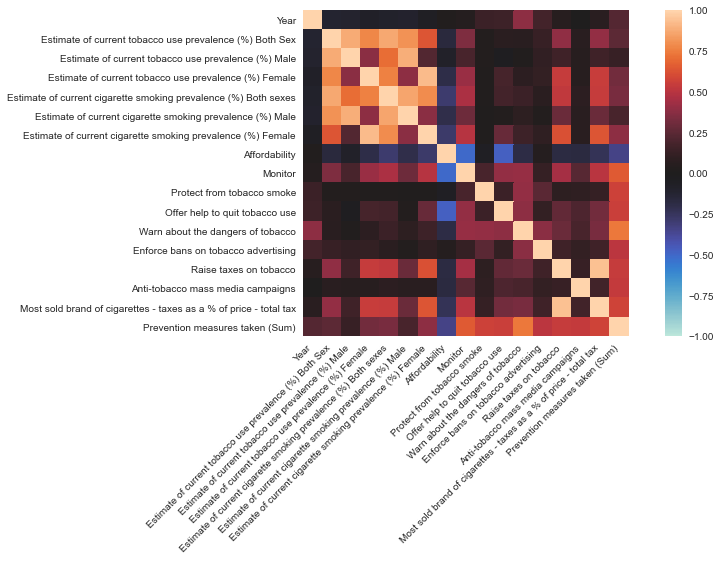

In [24]:
corr = tobacco.corr()
fig,ax = plt.subplots(figsize = (13,6))
ax = sns.heatmap(corr, 
                 vmin = -1,
                 vmax=1,
                 center=0,
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

The heatmap shows a positive correlation between estimates of cigarette smoking rates against estimates tobacco use prevalence. There is not much correlation with any other features such as the year the data was collected. There is a strong negative correlation between 'Affordability' and 'Monitor' as well as 'Affordability' and 'Offer help to quit tobacco use'. This suggests that stronger policies to monitor tobacco usage as well as help people quit using tobacco will results in the decreased affordability of cigarettes. This is surprising but could be explained by the fact that stronger tobacco policies may require greater government expenditure and thus may be passed on to consumers through greater taxes on cigarettes, thus decreasing their affordability. However, this explanation is not fully supported as the positive correlation between total taxes and other MPOWER columns is very weak.

It may be important to thus explore the correlation between specific features for specific groups of countries. Firstly, I will confirm the positive correlation between estimates of cigarette smoking rates and estimates of tobacco usage prevalence in the following visualisations.

### Scatter Plots of Estimates of Cigarette Smoking Rate against the Estimates of tobacco use rate

<AxesSubplot:xlabel='Estimate of current tobacco use prevalence (%) Both Sex', ylabel='Estimate of current cigarette smoking prevalence (%) Both sexes'>

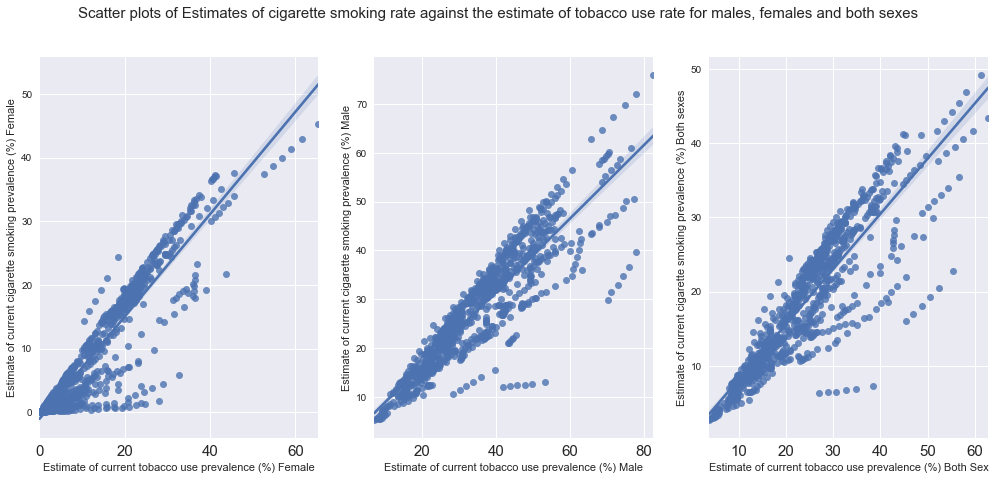

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (17,7))
fig.suptitle('Scatter plots of Estimates of cigarette smoking rate against the estimate of tobacco use rate for males, females and both sexes', fontsize = 15)
sns.regplot(x="Estimate of current tobacco use prevalence (%) Female",
            y="Estimate of current cigarette smoking prevalence (%) Female", data=current, ax= ax1)
sns.regplot(x="Estimate of current tobacco use prevalence (%) Male",
            y="Estimate of current cigarette smoking prevalence (%) Male", data=current, ax = ax2)
sns.regplot(x="Estimate of current tobacco use prevalence (%) Both Sex",
            y="Estimate of current cigarette smoking prevalence (%) Both sexes", data=current, ax = ax3)

Thus we can see that there is a positive linear relationship between females estimates of cigarette smoking prevalence and female estimates of current tobacco use prevalence. The same can be seen for males however its positive linear relationship is much stronger than that for females evident with the more closely grouped together points.

Let's see if there is any correlation between 'estimates of male smoking rates' and 'female smoking rates' of cigarettes and tobacco. From the previous heatmap, I am expecting there to be a less strong positive, linear relationship.

<AxesSubplot:xlabel='Estimate of current cigarette smoking prevalence (%) Female', ylabel='Estimate of current cigarette smoking prevalence (%) Male'>

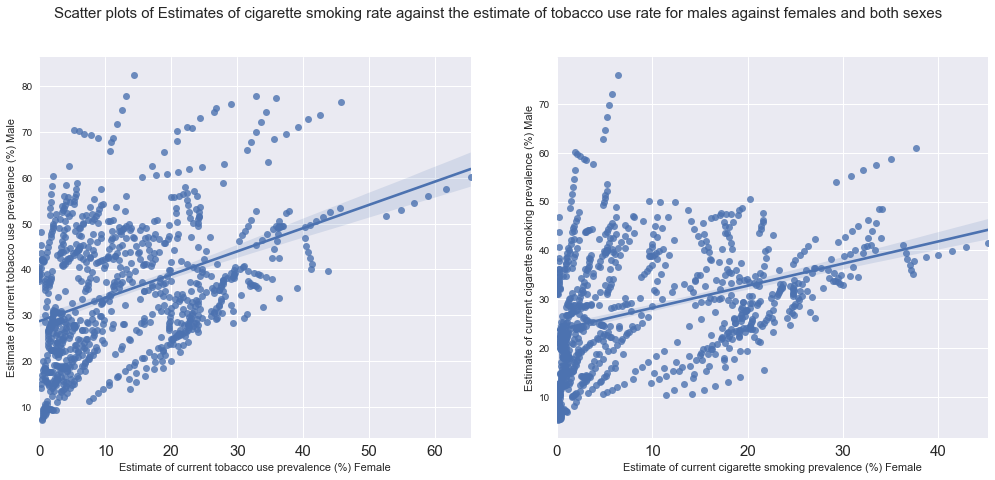

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (17,7))
fig.suptitle('Scatter plots of Estimates of cigarette smoking rate against the estimate of tobacco use rate for males against females and both sexes', fontsize = 15)
sns.regplot(x="Estimate of current tobacco use prevalence (%) Female",
            y="Estimate of current tobacco use prevalence (%) Male", data=current, ax= ax1)
sns.regplot(x="Estimate of current cigarette smoking prevalence (%) Female",
            y="Estimate of current cigarette smoking prevalence (%) Male", data=current, ax = ax2)

As expected there is a less strong positive, linear correlation between males and females in terms of estimates of cigarette smoking and tobacco use rates.

### Scatter Plot of Estimate of cigarette smoking rate for both sexes against total tax placed on cigarettes as a percentage of its price

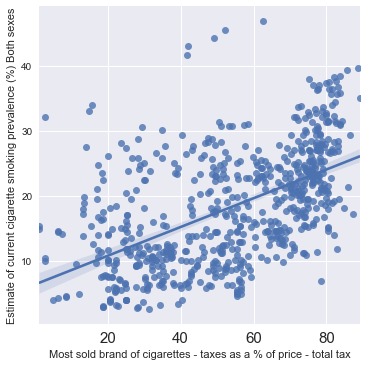

In [38]:
sns.lmplot(x = 'Most sold brand of cigarettes - taxes as a % of price - total tax', 
           y = 'Estimate of current cigarette smoking prevalence (%) Both sexes', data = tobacco)

Surprisingly, there seems to be perhaps a positive correlation between total taxes placed on cigarettes and estimates of cigarette smoking rates. This, is the opposite of what I expected, as I thought taxes aim to increase the cost of smoking and thus reduce smoking and tobacco usage.
To figure out how this happened, I analyze the relation between 'tax percentage of the cigarettes' and 'Affordability'.

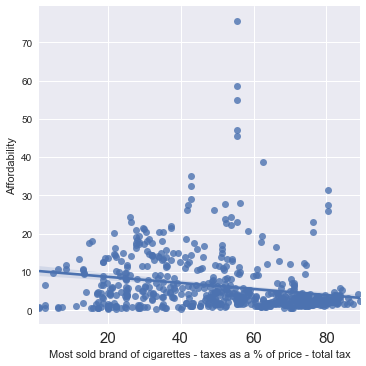

In [39]:
sns.lmplot(x = 'Most sold brand of cigarettes - taxes as a % of price - total tax', 
           y = 'Affordability', data = tobacco)

Surprisingly, when the 'taxes rate' is increasing 'Affordability' is decreasing. This means countries with high tax seems to be more affordable to get a cigarette at a fairly reasonable price.

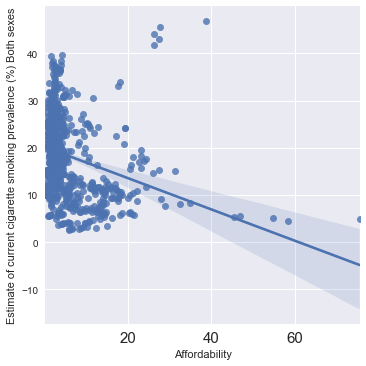

In [45]:
sns.lmplot(x = 'Affordability', 
           y = 'Estimate of current cigarette smoking prevalence (%) Both sexes', data = tobacco)

The higher the percentage of 'Affordability', the less affordable cigarettes are.

I will further explore this by separating the data into separate continents (Oceania, Europe, Africa, North America, South America and Asia) to see if there are some other relationships I may discover and how these may impact my prediction models.

## Visualisations by Continent

## Oceania

### Time series plot of smoking rate for both sexes between 2010 and 2018 for countries

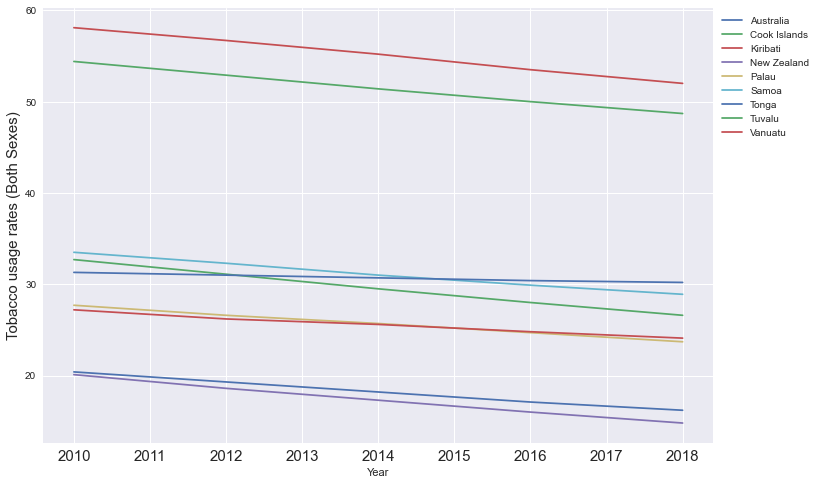

In [46]:
fig,ax= plt.subplots(figsize = (12,8))
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=15)
for n, group in Oceania.groupby('Country'):
    group.plot(x='Year',y='Estimate of current tobacco use prevalence (%) Both Sex', ax=ax,label=n)
    plt.ylabel('Tobacco usage rates (Both Sexes)', fontsize=15)
    plt.legend(bbox_to_anchor = (1,1), loc = 2)

Most of the countries except 'New Zealand' in Oceania have shown a slight downward trend in their tobacco usage rates for both sexes between 2010 and 2018.

### Time series plot of sum of prevention measures taken (from MPOWER) between 2010 and 2018 for countries

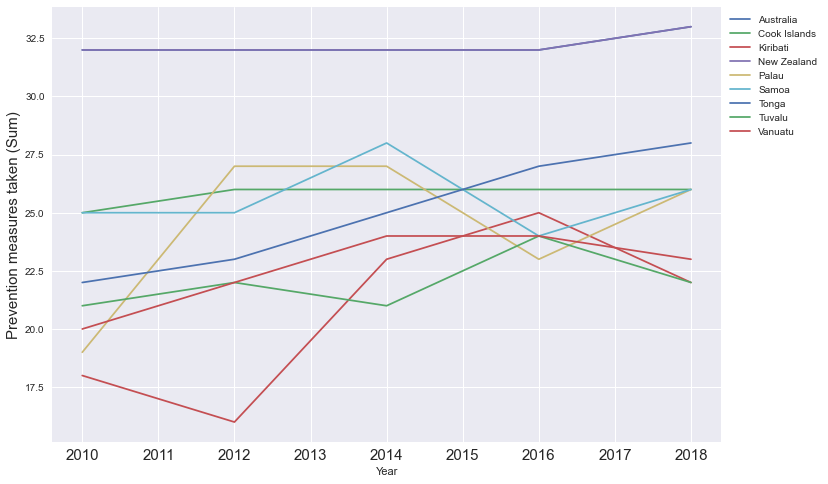

In [43]:
fig,ax= plt.subplots(figsize = (12,8))
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=15)
for n, group in Oceania.groupby('Country'):
    group.plot(x='Year',y='Prevention measures taken (Sum)', ax=ax,label=n)
    plt.ylabel('Prevention measures taken (Sum)', fontsize=15)
    plt.legend(bbox_to_anchor = (1,1), loc = 2)

Australia has had the most consistent and high value for prevention measures taken increasing only in 2018. New Zealand significantly increased its prevention measures between 2010 and 2018 while other countries were quite volatile in terms of the value of the prevention measures taken with an example being Vanuatu which decreased its prevention measure between 2010 and 2012, then increased between 2012 and 2016, and then decreased again between 2016 and 2018. 

### Heatmap to see if there is any correlation between certain features for Oceania specifically

[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'Estimate of current tobacco use prevalence (%) Both Sex'),
 Text(2.5, 0, 'Estimate of current tobacco use prevalence (%) Male'),
 Text(3.5, 0, 'Estimate of current tobacco use prevalence (%) Female'),
 Text(4.5, 0, 'Estimate of current cigarette smoking prevalence (%) Both sexes'),
 Text(5.5, 0, 'Estimate of current cigarette smoking prevalence (%) Male'),
 Text(6.5, 0, 'Estimate of current cigarette smoking prevalence (%) Female'),
 Text(7.5, 0, 'Affordability'),
 Text(8.5, 0, 'Monitor'),
 Text(9.5, 0, 'Protect from tobacco smoke'),
 Text(10.5, 0, 'Offer help to quit tobacco use'),
 Text(11.5, 0, 'Warn about the dangers of tobacco'),
 Text(12.5, 0, 'Enforce bans on tobacco advertising'),
 Text(13.5, 0, 'Raise taxes on tobacco'),
 Text(14.5, 0, 'Anti-tobacco mass media campaigns'),
 Text(15.5, 0, 'Most sold brand of cigarettes - taxes as a % of price - total tax'),
 Text(16.5, 0, 'Prevention measures taken (Sum)')]

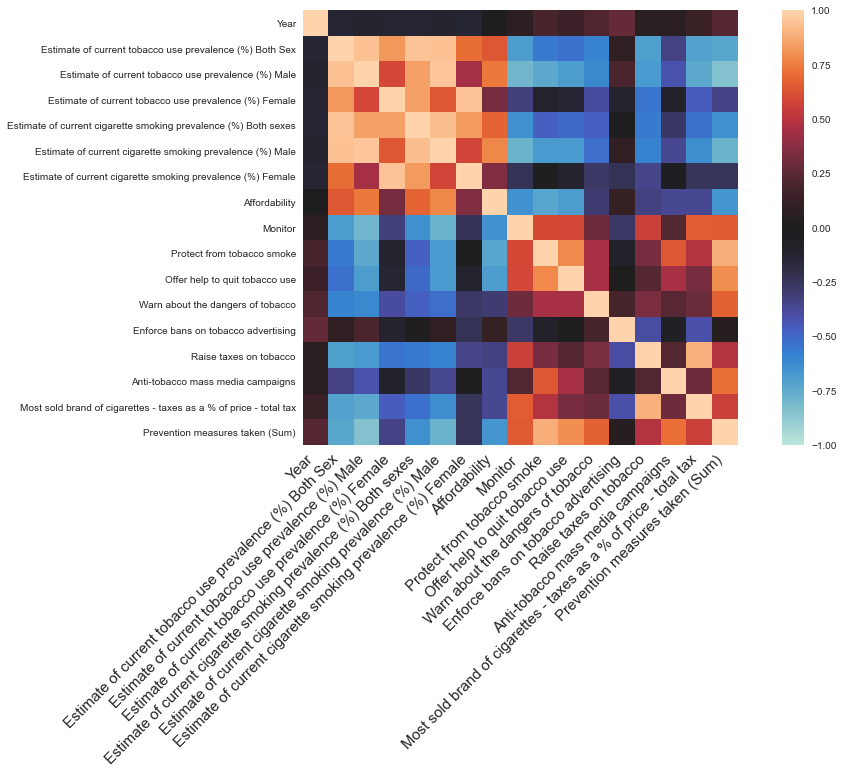

In [44]:
corr=Oceania.corr()
fig,ax= plt.subplots(figsize = (16,8))
ax = sns.heatmap(corr, vmin = -1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

The heatmap shows a strong positive correlation between estimates of smoking rates and estimates of tobacco usage rates for both sexes as well as individually for males and females. There is also quite a strong positive correlation between Affordability and estimates of tobacco and cigarette smoking rates. While affordability has a strong negative correlation with a few MPOWER indicators including monitor, protect from tobacco smoke, and offering to help quit tobacco smoke. Finally, there is a strong negative correlation between total tax on the most sold brand of cigarettes and the estimates of cigarette smoking and tobacco use rates for males, females and both sexes as well as with affordability.

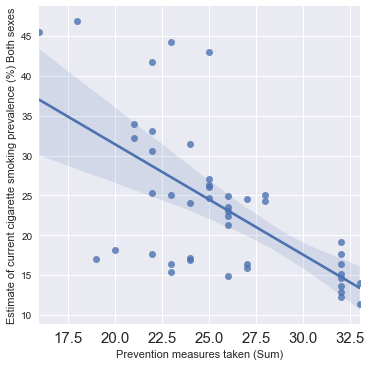

In [48]:
sns.lmplot(x = 'Prevention measures taken (Sum)', 
           y = 'Estimate of current cigarette smoking prevalence (%) Both sexes', data = Oceania)

In Oceania, when the more prevention measure took the less smoking happens.

### Boxplots to compare the variance of preventions measures taken across countries

<AxesSubplot:xlabel='Country', ylabel='Prevention measures taken (Sum)'>

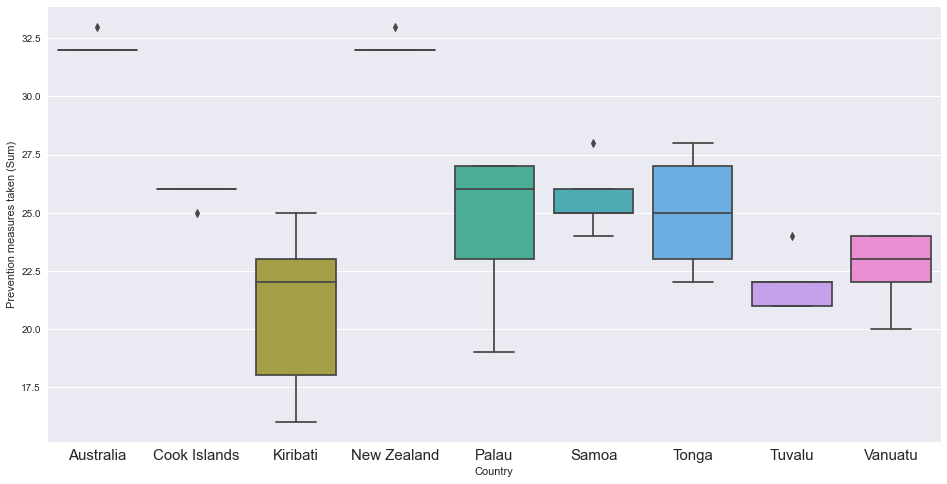

In [49]:
fig,ax= plt.subplots(figsize = (16,8))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
sns.boxplot(x="Country", y="Prevention measures taken (Sum)", data=Oceania)

As can be seen Australia, Cook Islands and New Zealand have had the least variance in terms of their prevention measures taken between 2010 and 2018. This corresponds to consistency within the policies implemented by these countries when it comes to cigarette smoking and tobacco usage. On the otherhand countries such as Kirbati, Palau and Tonga have had quite a variance in the value of their prevention measures taken between 2010 and 2018, this corresponds to these countries changing their policies more frequently during the period. From the previous visualisation I can indicate that this level of change can vary as Tonga consistently increased its Prevention measures taken during the period, while Kiribati varied from low to high to low values.

I could thus potentially include these as features within my models to see if there is any difference in tobacco usage rates between countries such as Australia and New Zealand where the prevention measures taken are the same each year compared to other countries such as Kiribati where it varies.

# Europe

### Time series plot of smoking rate for both sexes between 2010 and 2018 for countries

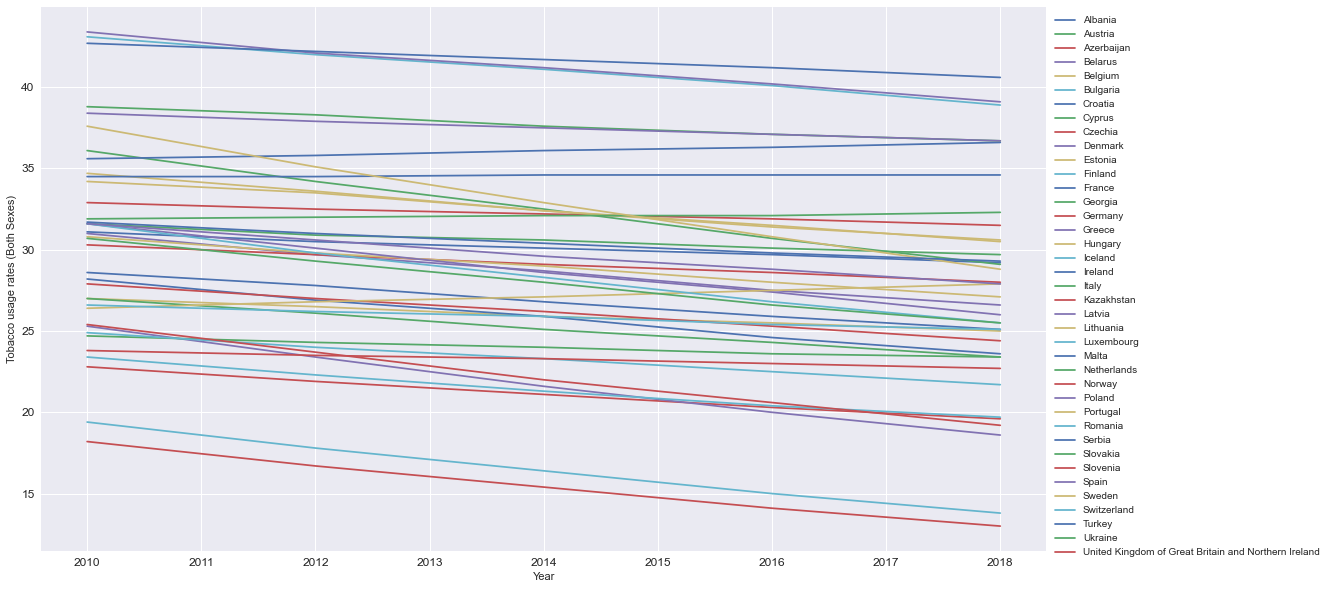

In [50]:
fig,ax= plt.subplots(figsize = (18,10))
plt.rc('ytick', labelsize=12)
for n, group in europe.groupby('Country'):
    group.plot(x='Year',y='Estimate of current tobacco use prevalence (%) Both Sex', ax=ax,label=n)
    plt.ylabel('Tobacco usage rates (Both Sexes)')
    plt.legend(bbox_to_anchor = (1,1), loc = 2)

It is quite hard to distinguish different countries within this visualisation, however we can see that most countries have had a decreasing tobacco usage rates between 2010 and 2018.

### Time series plot of sum of prevention measures taken (from MPOWER) between 2010 and 2018 for countries

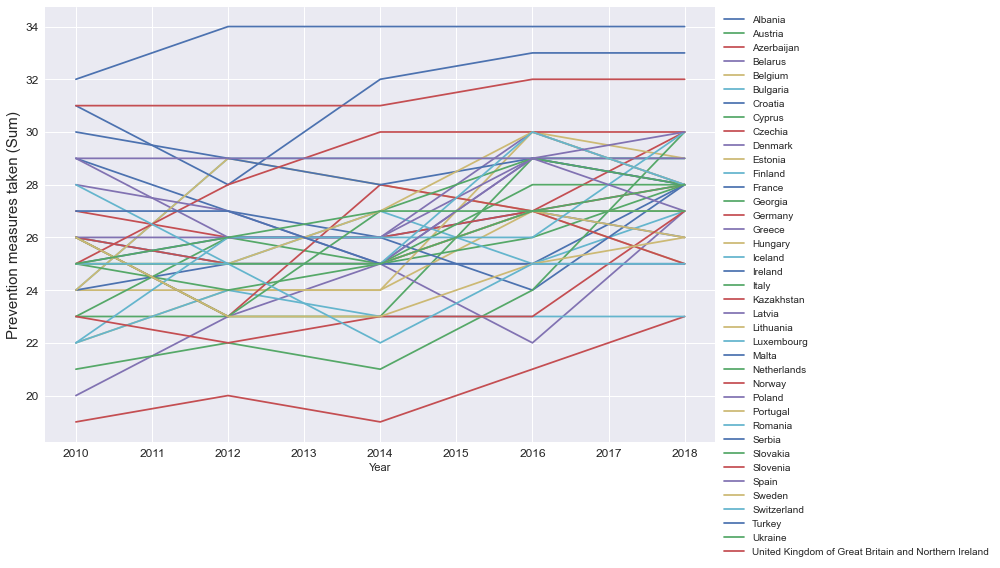

In [51]:
fig,ax= plt.subplots(figsize = (12,8))
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=15)
for n, group in europe.groupby('Country'):
    group.plot(x='Year',y='Prevention measures taken (Sum)', ax=ax,label=n)
    plt.ylabel('Prevention measures taken (Sum)', fontsize=15)
    plt.legend(bbox_to_anchor = (1,1), loc = 2)

Almost all of the European countries have varied their prevention measures taken each year the data was collected between 2010 and 2018 with very few countries having kept the same value for 4 or more years. 

### Heatmap to see if there is any correlation between certain features for Europe specifically

[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'Estimate of current tobacco use prevalence (%) Both Sex'),
 Text(2.5, 0, 'Estimate of current tobacco use prevalence (%) Male'),
 Text(3.5, 0, 'Estimate of current tobacco use prevalence (%) Female'),
 Text(4.5, 0, 'Estimate of current cigarette smoking prevalence (%) Both sexes'),
 Text(5.5, 0, 'Estimate of current cigarette smoking prevalence (%) Male'),
 Text(6.5, 0, 'Estimate of current cigarette smoking prevalence (%) Female'),
 Text(7.5, 0, 'Affordability'),
 Text(8.5, 0, 'Monitor'),
 Text(9.5, 0, 'Protect from tobacco smoke'),
 Text(10.5, 0, 'Offer help to quit tobacco use'),
 Text(11.5, 0, 'Warn about the dangers of tobacco'),
 Text(12.5, 0, 'Enforce bans on tobacco advertising'),
 Text(13.5, 0, 'Raise taxes on tobacco'),
 Text(14.5, 0, 'Anti-tobacco mass media campaigns'),
 Text(15.5, 0, 'Most sold brand of cigarettes - taxes as a % of price - total tax'),
 Text(16.5, 0, 'Prevention measures taken (Sum)')]

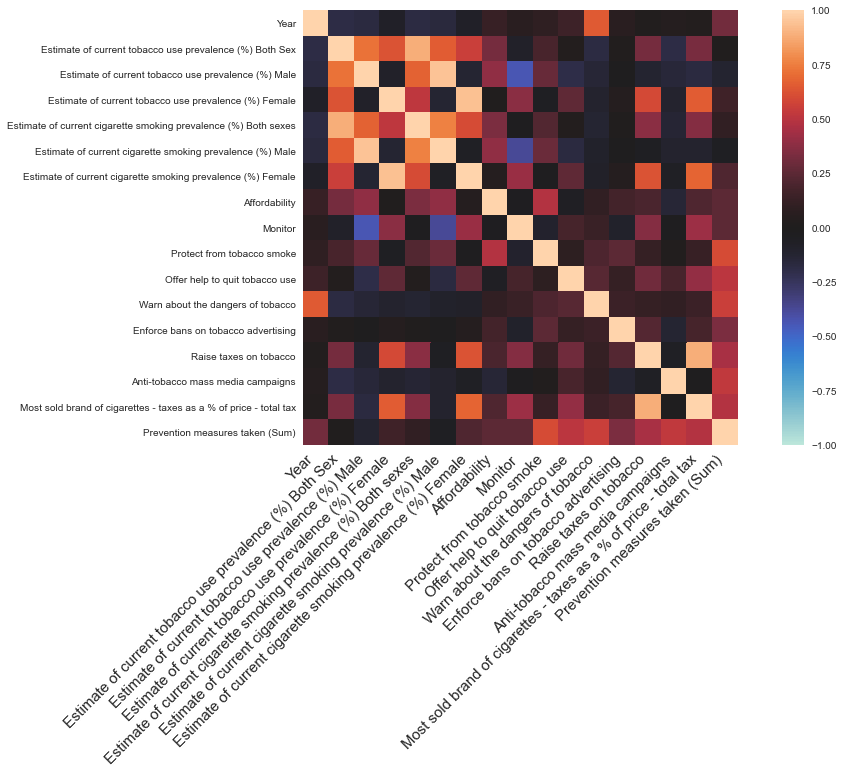

In [52]:
corr=europe.corr()
fig,ax= plt.subplots(figsize = (16,8))
ax = sns.heatmap(corr, vmin = -1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Unlike in Oceania there is not as strong of a correlation between certain features within Europe with many having a correlation coefficient value of around 0 with other features. There is a strong positive correlation between estimates of cigarette smoking rates and estimates of tobacco use rates as expected however they have a negative correlation with Monitor which is slightly surprising. Also there seems to be positive correlation between total taxes and estimates of cigarette smoking and tobacco use rates for females, and no correlation with estimates for males. This suggests that increases in the amount of taxes on cigarettes will lead to more females smoking cigarettes and using tobacco while not showing any effect on the rate of use for males.

Hence, I can already see there are many differences between continents that may make it difficult for my model to make accurate predictions as there could be confounding factors not included in the data such as cultural features of certain countries.

### Boxplots to compare the variance of preventions measures taken across countries

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Albania'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'Azerbaijan'),
  Text(3, 0, 'Belarus'),
  Text(4, 0, 'Belgium'),
  Text(5, 0, 'Bulgaria'),
  Text(6, 0, 'Croatia'),
  Text(7, 0, 'Cyprus'),
  Text(8, 0, 'Czechia'),
  Text(9, 0, 'Denmark'),
  Text(10, 0, 'Estonia'),
  Text(11, 0, 'Finland'),
  Text(12, 0, 'France'),
  Text(13, 0, 'Georgia'),
  Text(14, 0, 'Germany'),
  Text(15, 0, 'Greece'),
  Text(16, 0, 'Hungary'),
  Text(17, 0, 'Iceland'),
  Text(18, 0, 'Ireland'),
  Text(19, 0, 'Italy'),
  Text(20, 0, 'Kazakhstan'),
  Text(21, 0, 'Latvia'),
  Text(22, 0, 'Lithuania'),
  Text(23, 0, 'Luxembourg'),
  Text(24, 0, 'Malta'),
  Text(25, 0, 'Netherlands'),
  Text(26, 0, 'Norway'),
  Text(27, 0, 'Poland'),
  Text(28, 0, 'Portugal'),
  Text(29, 0, 'Romania'),
  Text(30, 0, 'Serbia'),
  Text(31, 0, 'S

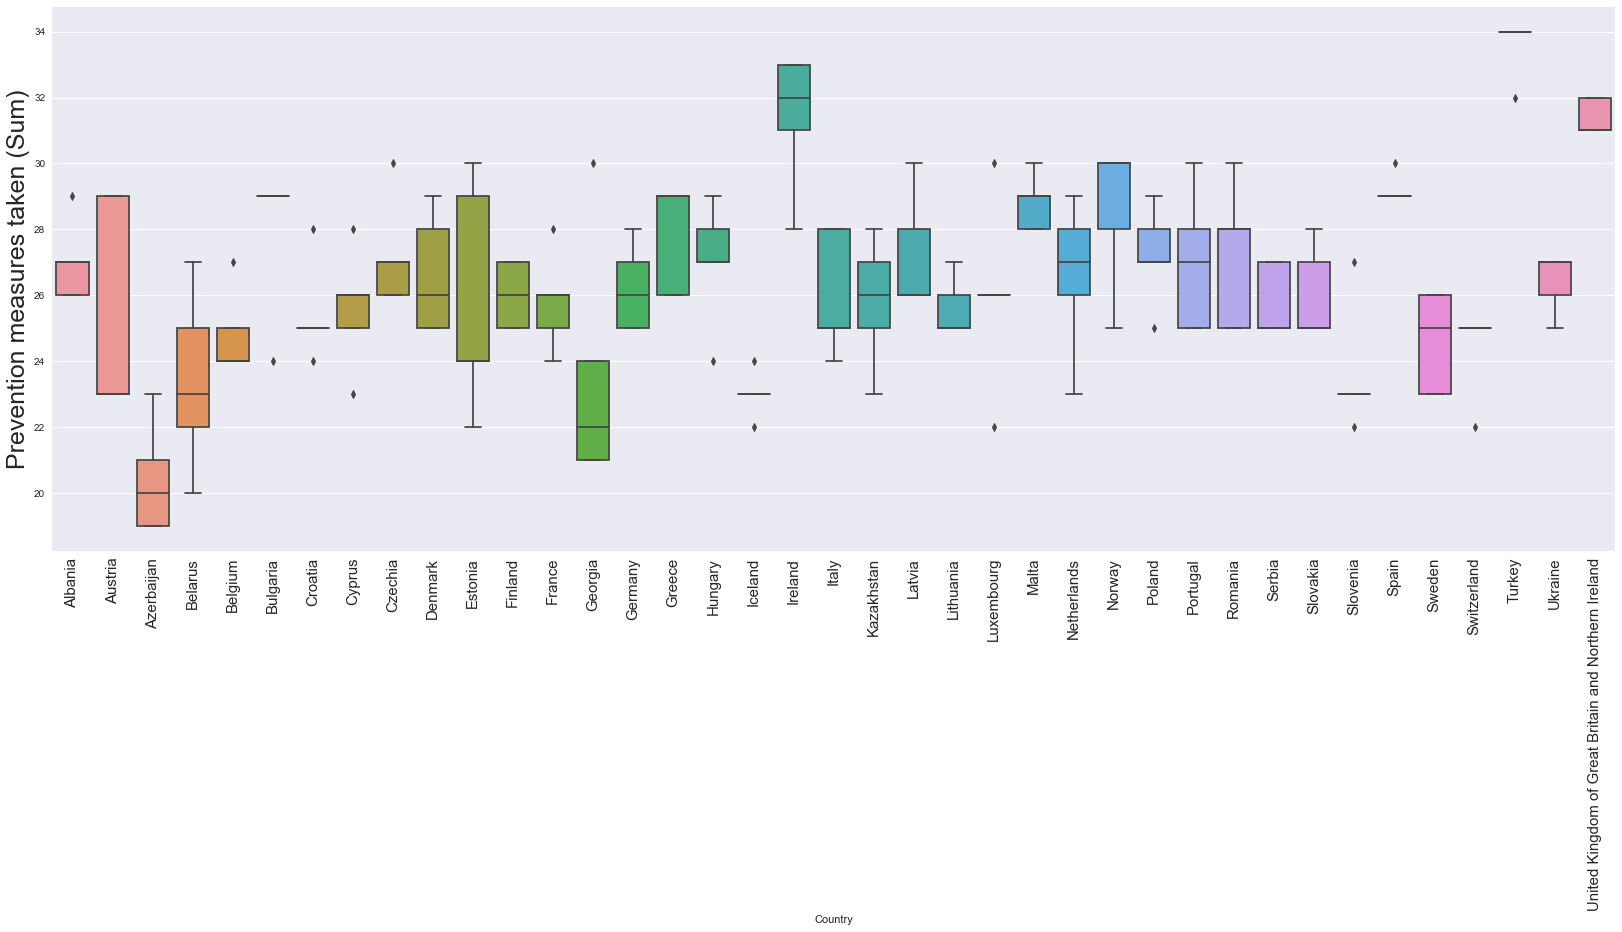

In [53]:
fig,ax= plt.subplots(figsize = (28,10))
sns.boxplot(x="Country", y="Prevention measures taken (Sum)", data=europe)
plt.ylabel("Prevention measures taken (Sum)", fontsize=25)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xticks(rotation = 90)

Turkey, Ireland and the UK have had the highest values of Prevention Measures taken in this period for European countries. Other countries have had quite a similar distribution in terms of their prevention measures taken. 

# Africa

### Time series plot of smoking rate for both sexes between 2010 and 2018 for countries

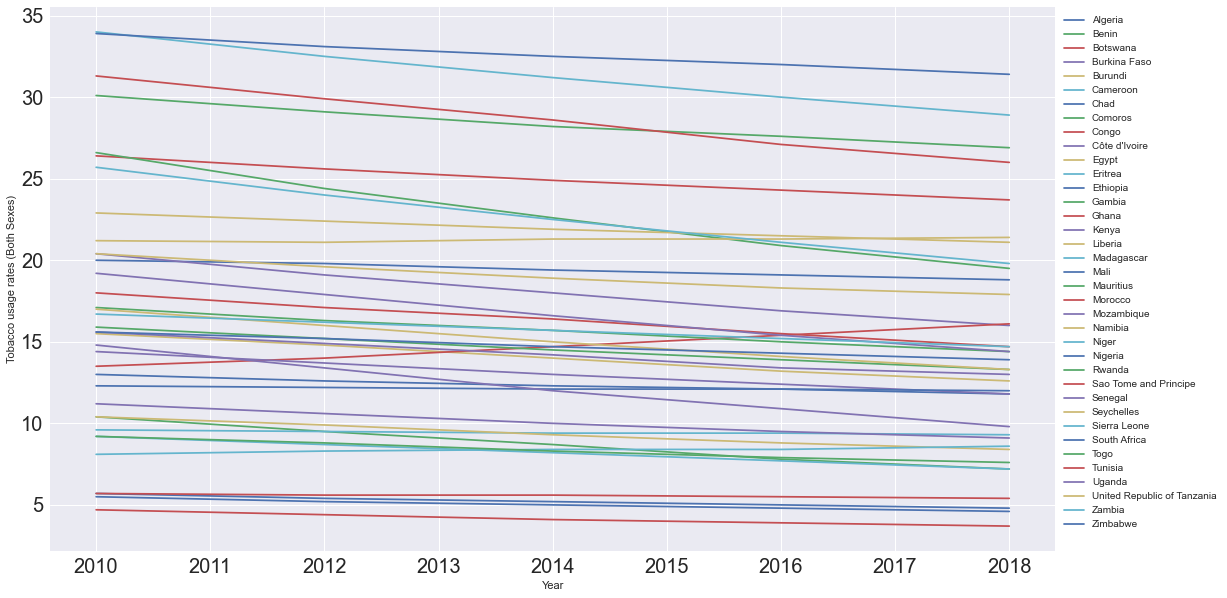

In [54]:
fig,ax= plt.subplots(figsize = (18,10))
plt.rc('ytick', labelsize=12)
for n, group in africa.groupby('Country'):
    group.plot(x='Year',y='Estimate of current tobacco use prevalence (%) Both Sex', ax=ax,label=n)
    plt.ylabel('Tobacco usage rates (Both Sexes)')
    plt.legend(bbox_to_anchor = (1,1), loc = 2)

For Africa I can indicate a few countries have had a decrease in their estimates of tobacco usage, a few have however seen an increase while many have remained almost the same.

### Time series plot of sum of prevention measures taken (from MPOWER) between 2010 and 2018 for countries

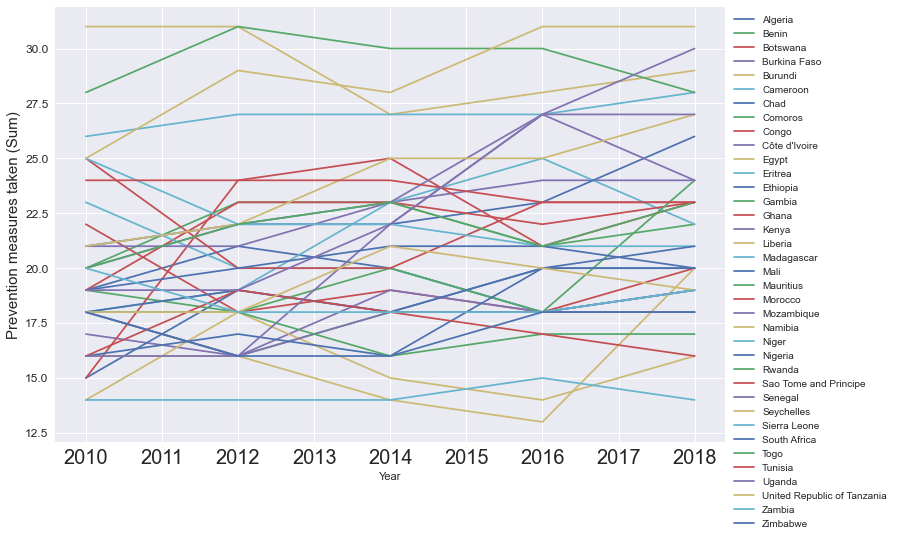

In [55]:
fig,ax= plt.subplots(figsize = (12,8))
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=15)
for n, group in africa.groupby('Country'):
    group.plot(x='Year',y='Prevention measures taken (Sum)', ax=ax,label=n)
    plt.ylabel('Prevention measures taken (Sum)', fontsize=15)
    plt.legend(bbox_to_anchor = (1,1), loc = 2)

Like in Europe I can observe quite a bit of variability in terms of the prevention measures taken by each country with very few consistently increasing or maintaining the same prevention measures for multiple years.

### Heatmap to see if there is any correlation between certain features for Africa specifically

[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'Estimate of current tobacco use prevalence (%) Both Sex'),
 Text(2.5, 0, 'Estimate of current tobacco use prevalence (%) Male'),
 Text(3.5, 0, 'Estimate of current tobacco use prevalence (%) Female'),
 Text(4.5, 0, 'Estimate of current cigarette smoking prevalence (%) Both sexes'),
 Text(5.5, 0, 'Estimate of current cigarette smoking prevalence (%) Male'),
 Text(6.5, 0, 'Estimate of current cigarette smoking prevalence (%) Female'),
 Text(7.5, 0, 'Affordability'),
 Text(8.5, 0, 'Monitor'),
 Text(9.5, 0, 'Protect from tobacco smoke'),
 Text(10.5, 0, 'Offer help to quit tobacco use'),
 Text(11.5, 0, 'Warn about the dangers of tobacco'),
 Text(12.5, 0, 'Enforce bans on tobacco advertising'),
 Text(13.5, 0, 'Raise taxes on tobacco'),
 Text(14.5, 0, 'Anti-tobacco mass media campaigns'),
 Text(15.5, 0, 'Most sold brand of cigarettes - taxes as a % of price - total tax'),
 Text(16.5, 0, 'Prevention measures taken (Sum)')]

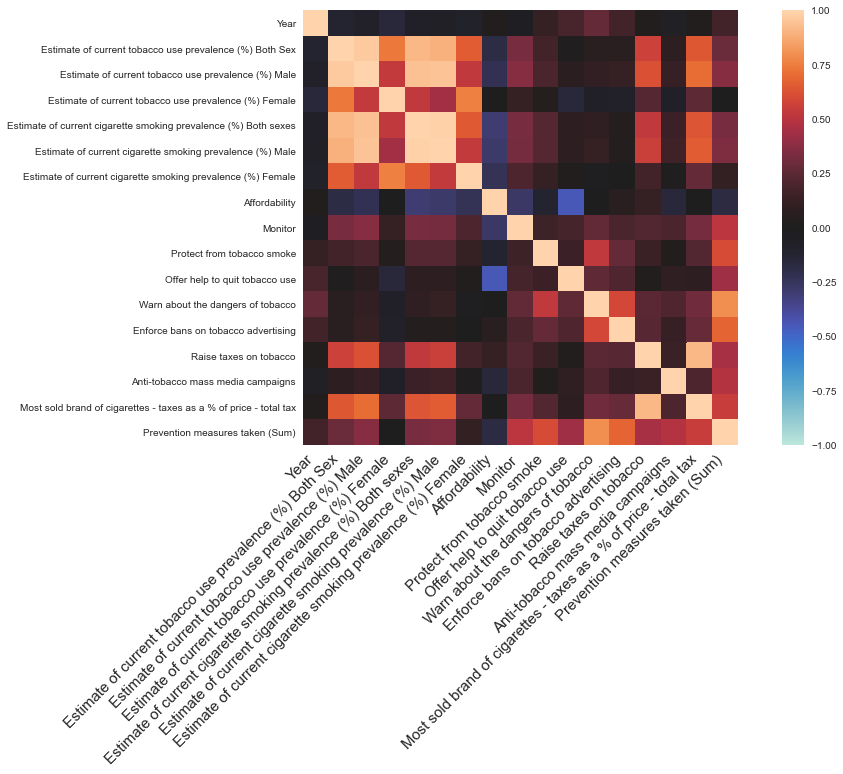

In [56]:
corr=africa.corr()
fig,ax= plt.subplots(figsize = (16,8))
ax = sns.heatmap(corr, vmin = -1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

For African countries we see a strong negative correlation between affordability and offer to help quit tobacco use. This is unexpected but may be explained by the fact that country's that spend more programs to help individuals quit tobacco usage may receive this money from the revenue raised as a result of the taxes they place on cigarettes and tobacco products.

However when we look at the heatmap we see a positive linear relationship between 'Most sold brand of cigarettes - taxes as a % of price - total tax' with estimates of cigarettes smoking and tobacco use rates for both sexes. This suggests that increases in the amount of taxes placed on cigarettes will increase the rates of smoking and tobacco use.

### Boxplots to compare the variance of preventions measures taken across countries

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Benin'),
  Text(2, 0, 'Botswana'),
  Text(3, 0, 'Burkina Faso'),
  Text(4, 0, 'Burundi'),
  Text(5, 0, 'Cameroon'),
  Text(6, 0, 'Chad'),
  Text(7, 0, 'Comoros'),
  Text(8, 0, 'Congo'),
  Text(9, 0, "Côte d'Ivoire"),
  Text(10, 0, 'Egypt'),
  Text(11, 0, 'Eritrea'),
  Text(12, 0, 'Ethiopia'),
  Text(13, 0, 'Gambia'),
  Text(14, 0, 'Ghana'),
  Text(15, 0, 'Kenya'),
  Text(16, 0, 'Liberia'),
  Text(17, 0, 'Madagascar'),
  Text(18, 0, 'Mali'),
  Text(19, 0, 'Mauritius'),
  Text(20, 0, 'Morocco'),
  Text(21, 0, 'Mozambique'),
  Text(22, 0, 'Namibia'),
  Text(23, 0, 'Niger'),
  Text(24, 0, 'Nigeria'),
  Text(25, 0, 'Rwanda'),
  Text(26, 0, 'Sao Tome and Principe'),
  Text(27, 0, 'Senegal'),
  Text(28, 0, 'Seychelles'),
  Text(29, 0, 'Sierra Leone'),
  Text(30, 0, 'South Africa'),
 

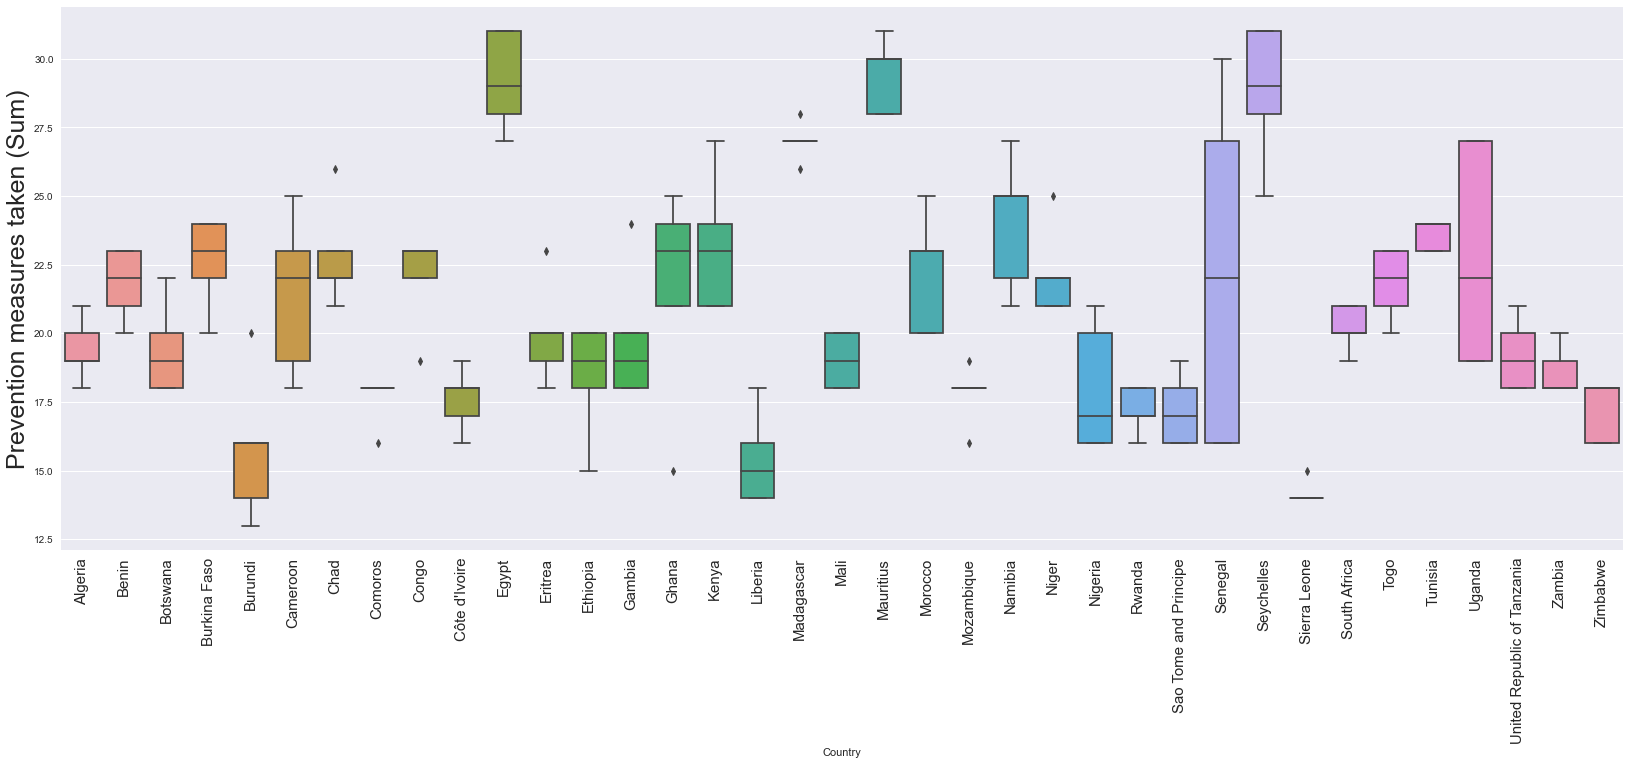

In [57]:
fig,ax= plt.subplots(figsize = (28,10))
sns.boxplot(x="Country", y="Prevention measures taken (Sum)", data=africa)
plt.ylabel("Prevention measures taken (Sum)", fontsize=25)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xticks(rotation = 90)

I can confirm that many African countries have a high level of variation in their prevention measures taken between 2010 and 2018 with Senegal and Uganda having the most change in their policies for prevention measures. Madagascar is the country with the highest amount of prevention measures out of the few which have had the most consistent values for prevention measures taken.

These distributions could be an explanation as to why some of the correlations between certain features in the heatmap are not as I expect them to be as the frequent changes in policies by many of these countries may lead to misleading representations of the change in smoking rates and tobacco use.

# North America

### Time series plot of smoking rate for both sexes between 2010 and 2018 for countries

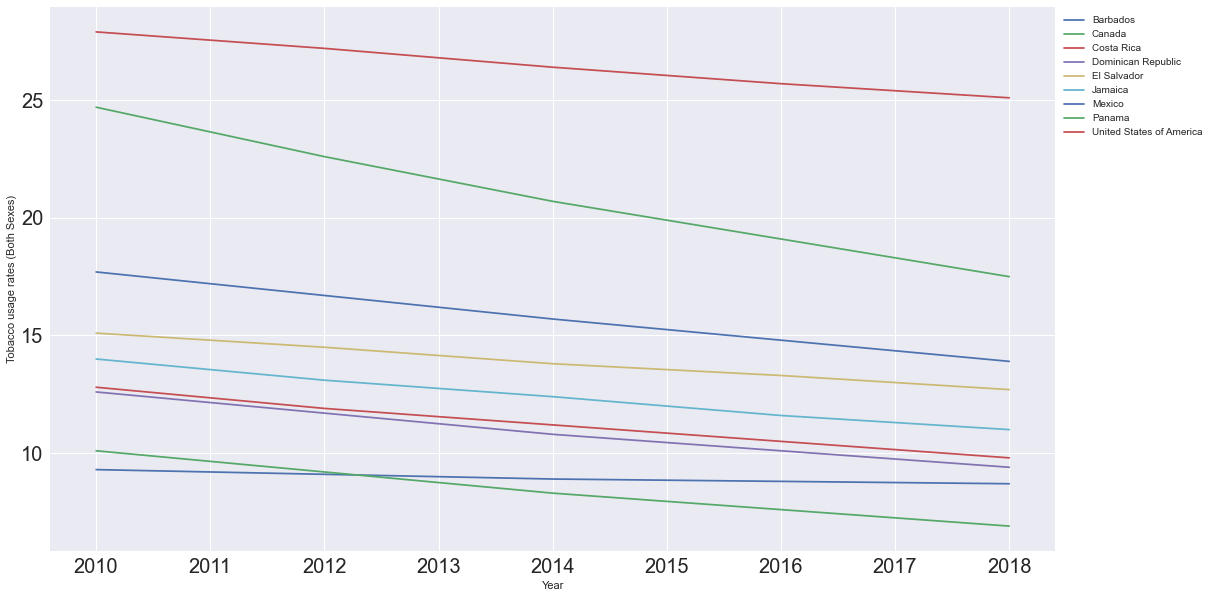

In [37]:
fig,ax= plt.subplots(figsize = (18,10))
plt.rc('ytick', labelsize=12)
for n, group in north_america.groupby('Country'):
    group.plot(x='Year',y='Estimate of current tobacco use prevalence (%) Both Sex', ax=ax,label=n)
    plt.ylabel('Tobacco usage rates (Both Sexes)')
    plt.legend(bbox_to_anchor = (1,1), loc = 2)

For North America I can indicate all the countries having shown a decrease in estimated tobacco usage rates for both sexes between 2010 and 2018.

### Time series plot of sum of prevention measures taken (from MPOWER) between 2010 and 2018 for countries

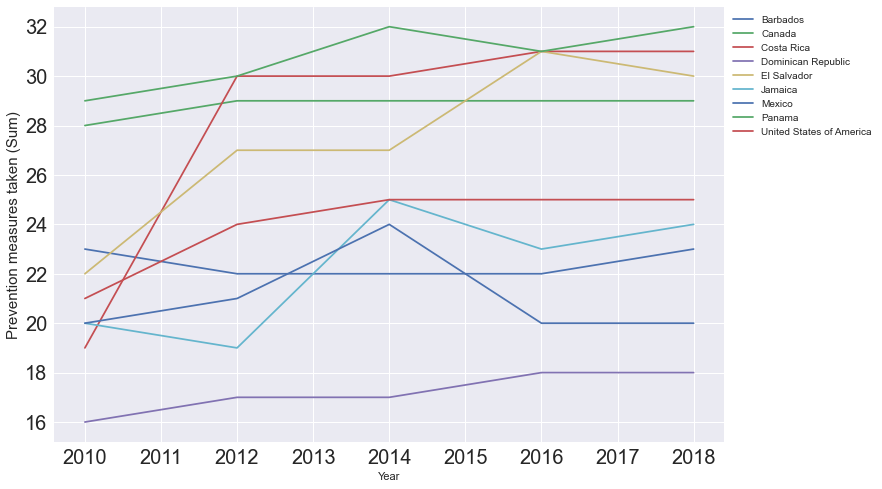

In [58]:
fig,ax= plt.subplots(figsize = (12,8))
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=15)
for n, group in north_america.groupby('Country'):
    group.plot(x='Year',y='Prevention measures taken (Sum)', ax=ax,label=n)
    plt.ylabel('Prevention measures taken (Sum)', fontsize=15)
    plt.legend(bbox_to_anchor = (1,1), loc = 2)

A few countries have some volatility in their prevention measures taken between 2010 and 2018 however the majority stay quite stable with the prevention measures taken staying around the same value.

### Heatmap to see if there is any correlation between certain features for North America specifically

[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'Estimate of current tobacco use prevalence (%) Both Sex'),
 Text(2.5, 0, 'Estimate of current tobacco use prevalence (%) Male'),
 Text(3.5, 0, 'Estimate of current tobacco use prevalence (%) Female'),
 Text(4.5, 0, 'Estimate of current cigarette smoking prevalence (%) Both sexes'),
 Text(5.5, 0, 'Estimate of current cigarette smoking prevalence (%) Male'),
 Text(6.5, 0, 'Estimate of current cigarette smoking prevalence (%) Female'),
 Text(7.5, 0, 'Affordability'),
 Text(8.5, 0, 'Monitor'),
 Text(9.5, 0, 'Protect from tobacco smoke'),
 Text(10.5, 0, 'Offer help to quit tobacco use'),
 Text(11.5, 0, 'Warn about the dangers of tobacco'),
 Text(12.5, 0, 'Enforce bans on tobacco advertising'),
 Text(13.5, 0, 'Raise taxes on tobacco'),
 Text(14.5, 0, 'Anti-tobacco mass media campaigns'),
 Text(15.5, 0, 'Most sold brand of cigarettes - taxes as a % of price - total tax'),
 Text(16.5, 0, 'Prevention measures taken (Sum)')]

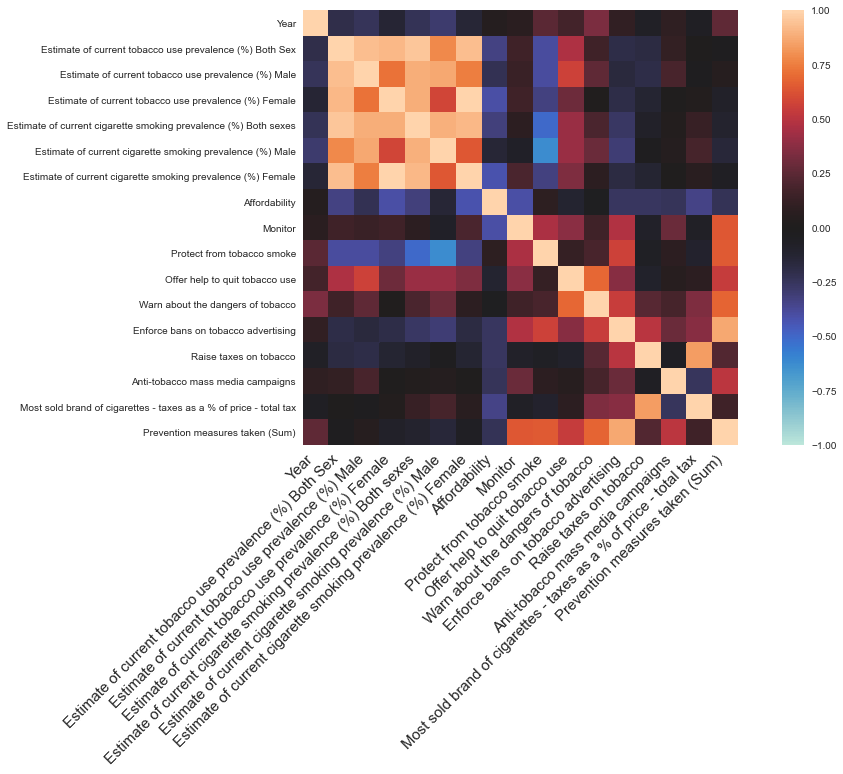

In [59]:
corr=north_america.corr()
fig,ax= plt.subplots(figsize = (16,8))
ax = sns.heatmap(corr, vmin = -1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

As normal, I can observe a strong positive correlation between estimates of cigarette smoking and tobacco use rates, these estimates also have a strong negative correlation with Protect from tobacco smoke. This implies that policies to prevent people from passive-smoking such as the introduction of no-smoking areas, lead to a reduction in the rates of cigarette smoking and tobacco use. This is expected as these sorts of policies aim to prevent the normalisation of tobacco use and thus seclude those who choose to do it from everyone else.

### Boxplots to compare the variance of preventions measures taken across countries

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Barbados'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'Costa Rica'),
  Text(3, 0, 'Dominican Republic'),
  Text(4, 0, 'El Salvador'),
  Text(5, 0, 'Jamaica'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'Panama'),
  Text(8, 0, 'United States of America')])

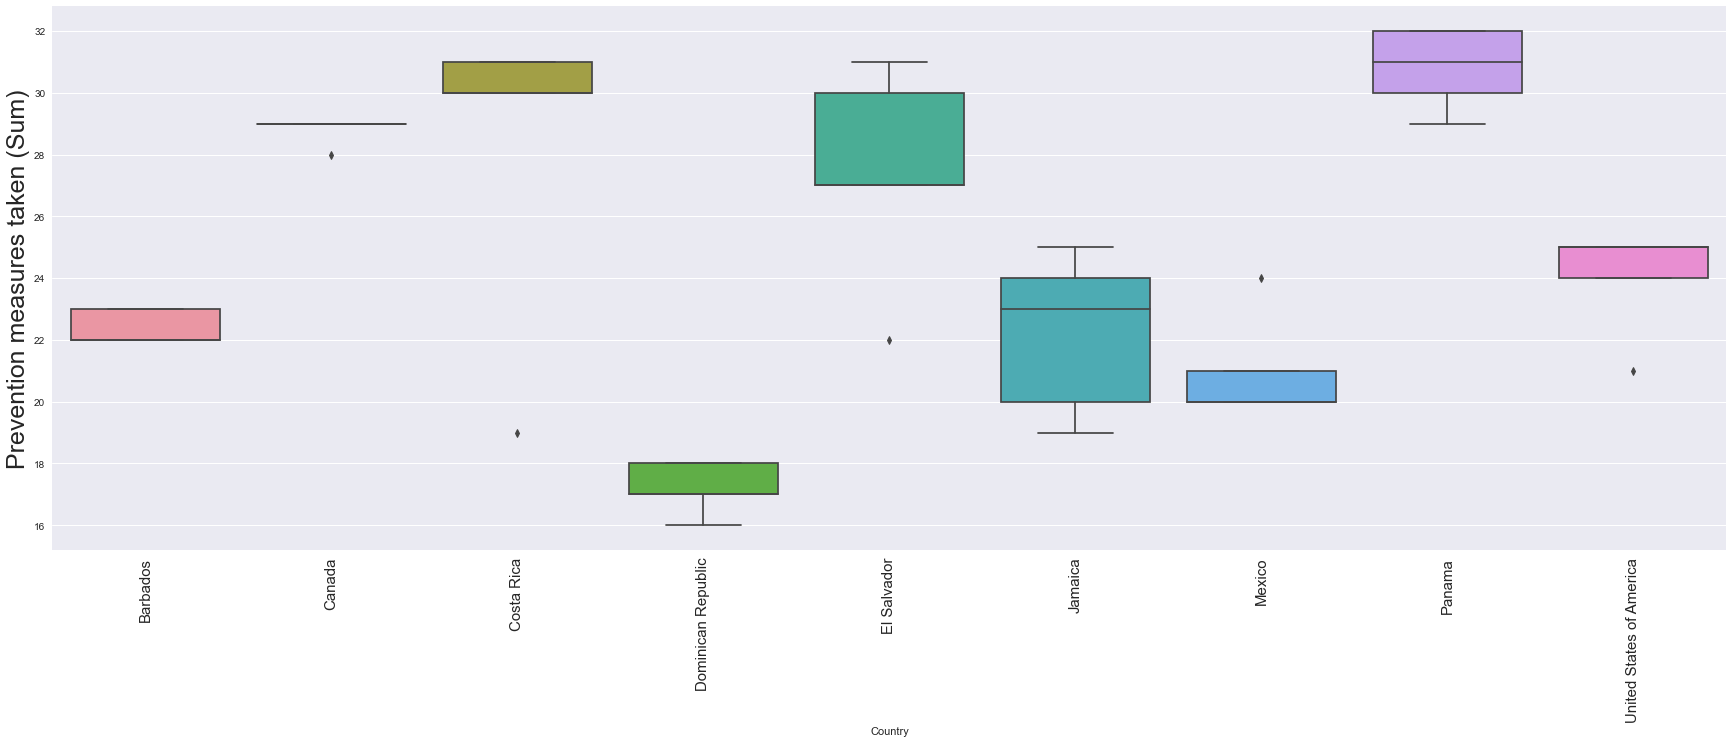

In [60]:
fig,ax= plt.subplots(figsize = (30,10))
sns.boxplot(x="Country", y="Prevention measures taken (Sum)", data=north_america)
plt.ylabel("Prevention measures taken (Sum)", fontsize=25)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xticks(rotation = 90)

Canada, Costa Rica, and Panama have the highest and most consistent Prevention measures taken values. Other than El Salvador and Jamaica, all countries in North America have very little variation in their prevention measures policies.

# South America

### Time series plot of smoking rate for both sexes between 2010 and 2018 for countries

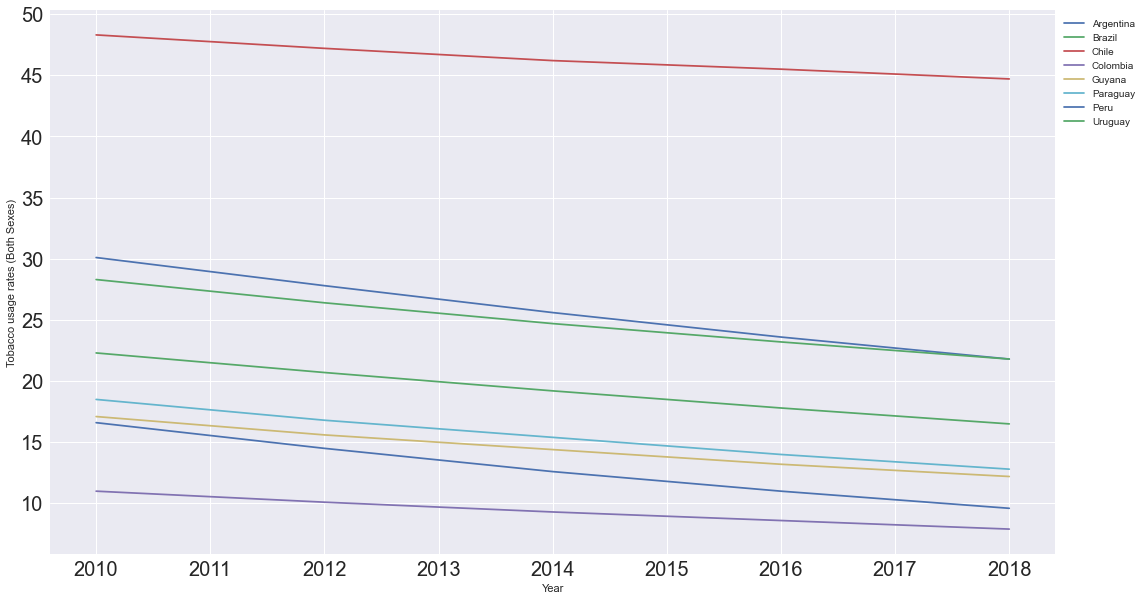

In [61]:
fig,ax= plt.subplots(figsize = (18,10))
plt.rc('ytick', labelsize=12)
for n, group in south_america.groupby('Country'):
    group.plot(x='Year',y='Estimate of current tobacco use prevalence (%) Both Sex', ax=ax,label=n)
    plt.ylabel('Tobacco usage rates (Both Sexes)')
    plt.legend(bbox_to_anchor = (1,1), loc = 2)

Once again all countries in South America are showing a decreasing trend in their tobacco usage rates for both sexes. 

### Time series plot of sum of prevention measures taken (from MPOWER) between 2010 and 2018 for countries

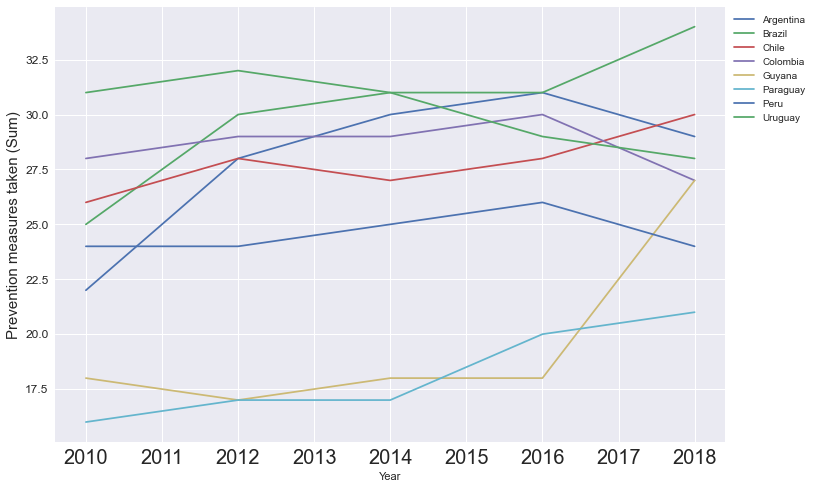

In [62]:
fig,ax= plt.subplots(figsize = (12,8))
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=15)
for n, group in south_america.groupby('Country'):
    group.plot(x='Year',y='Prevention measures taken (Sum)', ax=ax,label=n)
    plt.ylabel('Prevention measures taken (Sum)', fontsize=15)
    plt.legend(bbox_to_anchor = (1,1), loc = 2)

In South America most countries have keep their prevention measures taken quite similar each year with a few showing consistent increases between 2010 and 2018.

### Heatmap to see if there is any correlation between certain features for South America specifically

[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'Estimate of current tobacco use prevalence (%) Both Sex'),
 Text(2.5, 0, 'Estimate of current tobacco use prevalence (%) Male'),
 Text(3.5, 0, 'Estimate of current tobacco use prevalence (%) Female'),
 Text(4.5, 0, 'Estimate of current cigarette smoking prevalence (%) Both sexes'),
 Text(5.5, 0, 'Estimate of current cigarette smoking prevalence (%) Male'),
 Text(6.5, 0, 'Estimate of current cigarette smoking prevalence (%) Female'),
 Text(7.5, 0, 'Affordability'),
 Text(8.5, 0, 'Monitor'),
 Text(9.5, 0, 'Protect from tobacco smoke'),
 Text(10.5, 0, 'Offer help to quit tobacco use'),
 Text(11.5, 0, 'Warn about the dangers of tobacco'),
 Text(12.5, 0, 'Enforce bans on tobacco advertising'),
 Text(13.5, 0, 'Raise taxes on tobacco'),
 Text(14.5, 0, 'Anti-tobacco mass media campaigns'),
 Text(15.5, 0, 'Most sold brand of cigarettes - taxes as a % of price - total tax'),
 Text(16.5, 0, 'Prevention measures taken (Sum)')]

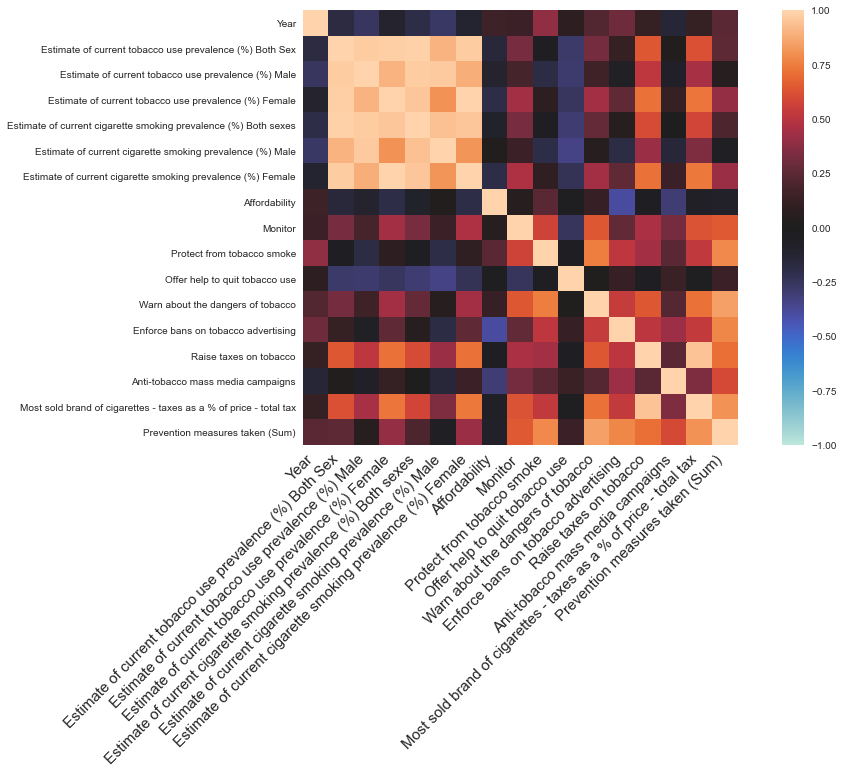

In [63]:
corr=south_america.corr()
fig,ax= plt.subplots(figsize = (16,8))
ax = sns.heatmap(corr, vmin = -1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Once again there is a strong positive correlation between estimates of cigarette smoking rates and estimates of tobacco use rates for males, females and both sexes. Yet there is a positive correlation between the total taxes on the most sold brand of cigarettes and the estimates of tobacco and cigarette smoking use, which as stated before suggests that increased taxes on cigarettes will increase the rate of smoking and tobacco use.

### Boxplots to compare the variance of preventions measures taken across countries

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Chile'),
  Text(3, 0, 'Colombia'),
  Text(4, 0, 'Guyana'),
  Text(5, 0, 'Paraguay'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'Uruguay')])

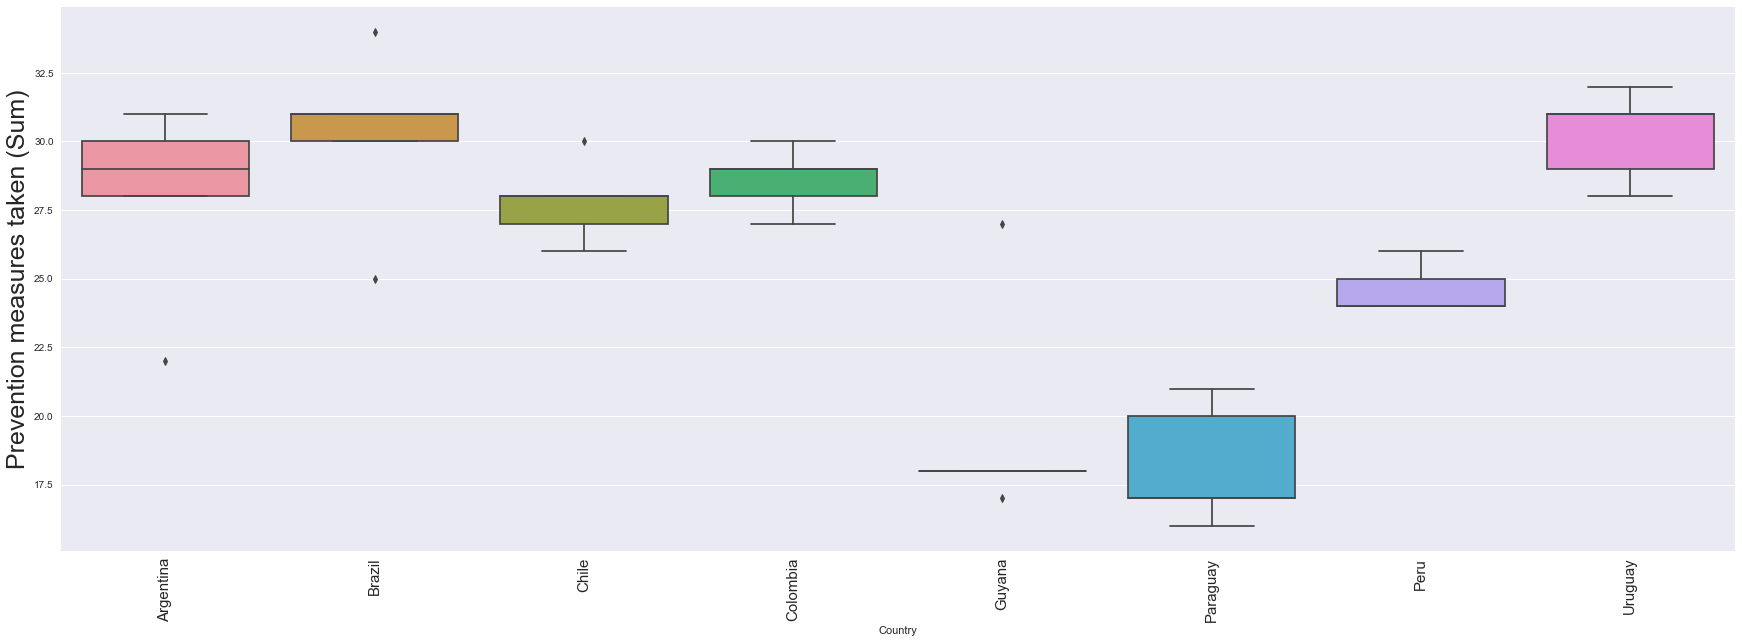

In [64]:
fig,ax= plt.subplots(figsize = (30,10))
sns.boxplot(x="Country", y="Prevention measures taken (Sum)", data=south_america)
plt.ylabel("Prevention measures taken (Sum)", fontsize=25)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xticks(rotation = 90)

I can indicate that other than Paraguay, most countries have kept their prevention measures taken to be relatively consistent between 2010 and 2018, with Guyana keeping basically the same level of prevention measures each year, yet at quite a low level. Guyana and Paraguay may act as outliers for South America in that they do not have similar levels of prevention measures implemented like the rest of the countries.

# Asia

### Time series plot of smoking rate for both sexes between 2010 and 2018 for countries

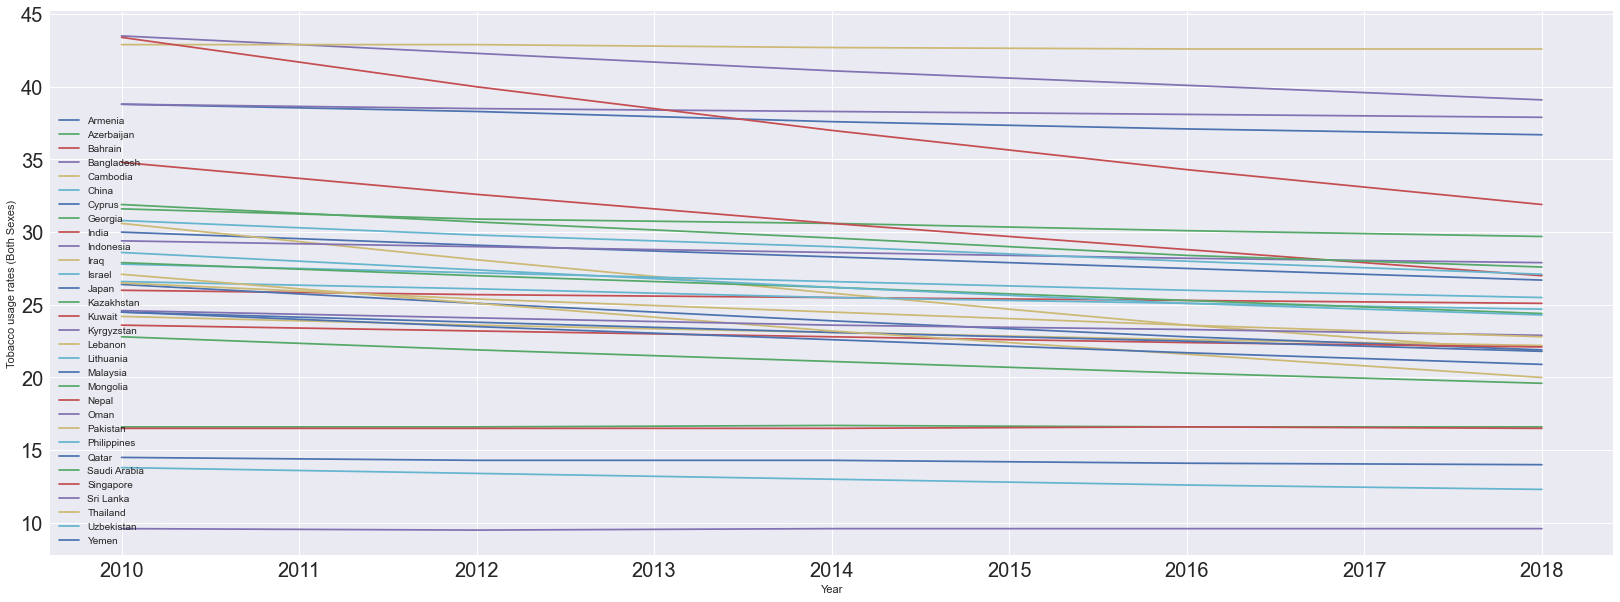

In [65]:
fig,ax= plt.subplots(figsize = (28,10))
for n, group in asia.groupby('Country'):
    group.plot(x='Year',y='Estimate of current tobacco use prevalence (%) Both Sex', ax=ax,label=n)
    plt.ylabel('Tobacco usage rates (Both Sexes)')

Most countries show a slight decrease in tobacco usage rates between 2010 and 2018 however a few have seen slight increases or remained roughly the same. 

### Time series plot of sum of prevention measures taken (from MPOWER) between 2010 and 2018 for countries

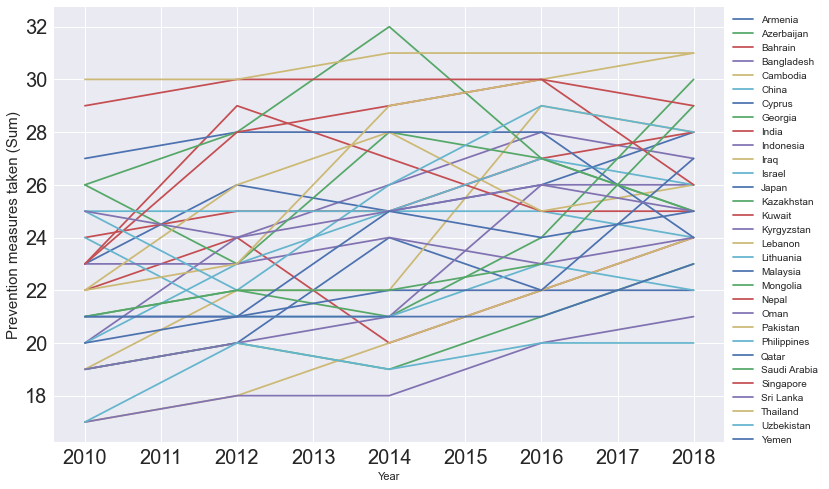

In [66]:
fig,ax= plt.subplots(figsize = (12,8))
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=15)
for n, group in asia.groupby('Country'):
    group.plot(x='Year',y='Prevention measures taken (Sum)', ax=ax,label=n)
    plt.ylabel('Prevention measures taken (Sum)', fontsize=15)
    plt.legend(bbox_to_anchor = (1,1), loc = 2)

There is quite a bit of changes in the prevention mesures taken by each country across each year in Asia as can be seen with very few countries showing either a consistent increase in measures or relatively the same level of prevention measures.

### Heatmap to see if there is any correlation between certain features for Asia specifically

[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'Estimate of current tobacco use prevalence (%) Both Sex'),
 Text(2.5, 0, 'Estimate of current tobacco use prevalence (%) Male'),
 Text(3.5, 0, 'Estimate of current tobacco use prevalence (%) Female'),
 Text(4.5, 0, 'Estimate of current cigarette smoking prevalence (%) Both sexes'),
 Text(5.5, 0, 'Estimate of current cigarette smoking prevalence (%) Male'),
 Text(6.5, 0, 'Estimate of current cigarette smoking prevalence (%) Female'),
 Text(7.5, 0, 'Affordability'),
 Text(8.5, 0, 'Monitor'),
 Text(9.5, 0, 'Protect from tobacco smoke'),
 Text(10.5, 0, 'Offer help to quit tobacco use'),
 Text(11.5, 0, 'Warn about the dangers of tobacco'),
 Text(12.5, 0, 'Enforce bans on tobacco advertising'),
 Text(13.5, 0, 'Raise taxes on tobacco'),
 Text(14.5, 0, 'Anti-tobacco mass media campaigns'),
 Text(15.5, 0, 'Most sold brand of cigarettes - taxes as a % of price - total tax'),
 Text(16.5, 0, 'Prevention measures taken (Sum)')]

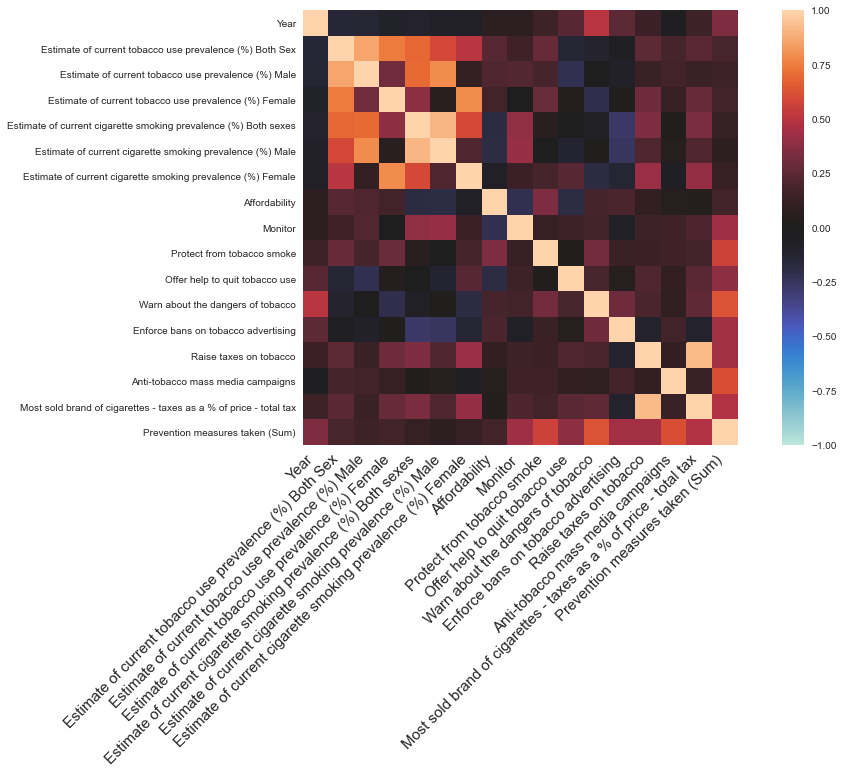

In [67]:
corr=asia.corr()
fig,ax= plt.subplots(figsize = (16,8))
ax = sns.heatmap(corr, vmin = -1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

The positive correlation between estimates of cigarette smoking and tobacco use rates is not as high as for other continents while other features have very little to no other correlation with other features. This may be caused by such the high variation in prevention measures taken by each Asian country.

### Boxplots to compare the variance of preventions measures taken across countries

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Armenia'),
  Text(1, 0, 'Azerbaijan'),
  Text(2, 0, 'Bahrain'),
  Text(3, 0, 'Bangladesh'),
  Text(4, 0, 'Cambodia'),
  Text(5, 0, 'China'),
  Text(6, 0, 'Cyprus'),
  Text(7, 0, 'Georgia'),
  Text(8, 0, 'India'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Iraq'),
  Text(11, 0, 'Israel'),
  Text(12, 0, 'Japan'),
  Text(13, 0, 'Kazakhstan'),
  Text(14, 0, 'Kuwait'),
  Text(15, 0, 'Kyrgyzstan'),
  Text(16, 0, 'Lebanon'),
  Text(17, 0, 'Lithuania'),
  Text(18, 0, 'Malaysia'),
  Text(19, 0, 'Mongolia'),
  Text(20, 0, 'Nepal'),
  Text(21, 0, 'Oman'),
  Text(22, 0, 'Pakistan'),
  Text(23, 0, 'Philippines'),
  Text(24, 0, 'Qatar'),
  Text(25, 0, 'Saudi Arabia'),
  Text(26, 0, 'Singapore'),
  Text(27, 0, 'Sri Lanka'),
  Text(28, 0, 'Thailand'),
  Text(29, 0, 'Uzbekistan'),
  Text(30, 0, 'Yemen')])

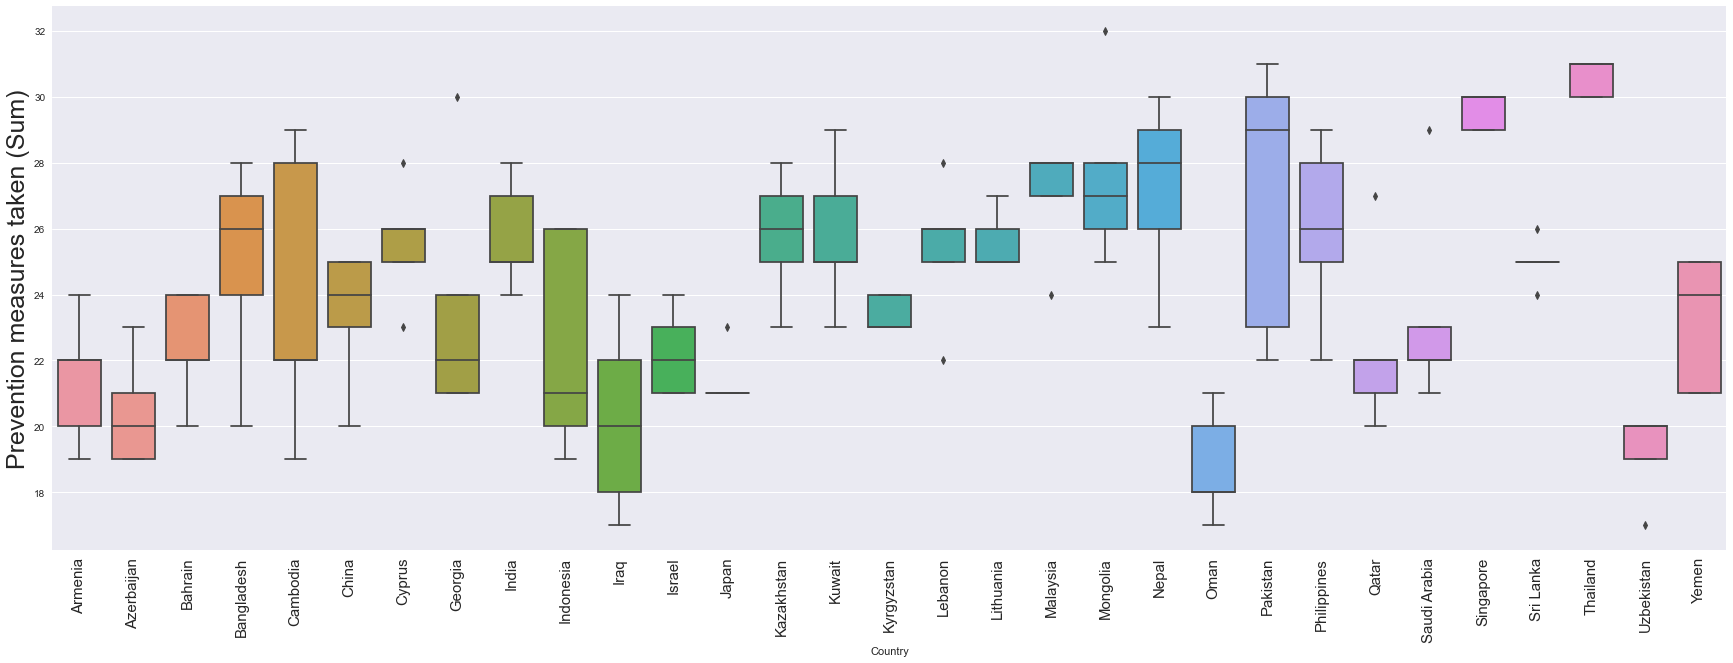

In [68]:
fig,ax= plt.subplots(figsize = (30,10))
sns.boxplot(x="Country", y="Prevention measures taken (Sum)", data=asia)
plt.ylabel("Prevention measures taken (Sum)", fontsize=25)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xticks(rotation = 90)

Once agin I can indicate the large variance in prevention measures taken by each country as Japan and Sri Lanka are the only ones which have kept the same levels of prevention measures almost every year. Thus it is difficult to tell if the decrease in smoking rates among the majority of Asian countries can be attributed to government policies or other factors not included in the data.

## Overall conclusions after exploring visualisations of data

Thus, we can see that there may be other factors associated with countries and their rates of smoking and tobacco use which are not included in the data and thus make will make it difficult to compare policies across countries. This will impact the success of our prediction models as it seems from this initial exploration of the data that policies that work in reducing smoking rates in one country may not specifically work in other countries. This could be caused by cultural factors as well as the fact that many countries are constantly changing their levels of prevention measures each year, thus leading to no effect on estimates of tobacco usage rates.

# Building Prediction Models

First we will build a small scale linear regression model for Europe, then we will build one for the entire tobacco data frame

### Changing categorical variables into dummy variables

In [49]:
europe_1=pd.get_dummies(europe['Protect from tobacco smoke'])
europe_2=pd.get_dummies(europe['Offer help to quit tobacco use'])
europe_3=pd.get_dummies(europe['Warn about the dangers of tobacco'])
europe_4=pd.get_dummies(europe['Enforce bans on tobacco advertising'])
europe_5=pd.get_dummies(europe['Raise taxes on tobacco'])
europe_6=pd.get_dummies(europe['Anti-tobacco mass media campaigns'])
europe_7=pd.get_dummies(europe['Monitor'])

europe_1.rename(columns={1:'Protect from tobacco smoke 1',2:'Protect from tobacco smoke 2',3:'Protect from tobacco smoke 3',4:'Protect from tobacco smoke 4',5:'Protect from tobacco smoke 5'}, inplace=True)
europe_2.rename(columns={2:'Offer help to quit tobacco use 2',3:'Offer help to quit tobacco use 3',4:'Offer help to quit tobacco use 4',5:'Offer help to quit tobacco use 5'}, inplace=True)
europe_3.rename(columns={3:'Warn about the dangers of tobacco 3',4:'Warn about the dangers of tobacco 4',5:'Warn about the dangers of tobacco 5'}, inplace=True)
europe_4.rename(columns={2:'Enforce bans on tobacco advertising 2',4:'Enforce bans on tobacco advertising 4',5:'Enforce bans on tobacco advertising 5'}, inplace=True)
europe_5.rename(columns={2:'Raise taxes on tobacco 2',3:'Raise taxes on tobacco 3',4:'Raise taxes on tobacco 4',5:'Raise taxes on tobacco 5'}, inplace=True)
europe_6.rename(columns={1:'Anti-tobacco mass media campaigns 1',2:'Anti-tobacco mass media campaigns 2',3:'Anti-tobacco mass media campaigns 3',4:'Anti-tobacco mass media campaigns 4',5:'Anti-tobacco mass media campaigns 5'}, inplace=True)
europe_7.rename(columns={2:'Monitor 2',3:'Monitor 3',4:'Monitor 4'}, inplace=True)

europe_full=europe.join(europe_1)
europe_full=europe_full.join(europe_2)
europe_full=europe_full.join(europe_3)
europe_full=europe_full.join(europe_4)
europe_full=europe_full.join(europe_5)
europe_full=europe_full.join(europe_6)
europe_full=europe_full.join(europe_7)
europe_full.head()

,Country,Year,Estimate of current tobacco use prevalence (%) Both Sex,Estimate of current tobacco use prevalence (%) Male,Estimate of current tobacco use prevalence (%) Female,Estimate of current cigarette smoking prevalence (%) Both sexes,Estimate of current cigarette smoking prevalence (%) Male,Estimate of current cigarette smoking prevalence (%) Female,Affordability,Monitor,...,Raise taxes on tobacco 4,Raise taxes on tobacco 5,Anti-tobacco mass media campaigns 1,Anti-tobacco mass media campaigns 2,Anti-tobacco mass media campaigns 3,Anti-tobacco mass media campaigns 4,Anti-tobacco mass media campaigns 5,Monitor 2,Monitor 3,Monitor 4
0,Albania,2018,29.2,50.5,7.9,24.2,43.3,5.0,4.17,2,...,1,0,0,1,0,0,0,1,0,0
1,Albania,2016,29.7,51.1,8.2,24.5,43.7,5.2,4.48,2,...,1,0,0,0,1,0,0,1,0,0
2,Albania,2014,30.1,51.7,8.5,24.8,44.3,5.4,4.14,2,...,1,0,0,1,0,0,0,1,0,0
3,Albania,2012,30.5,52.3,8.8,25.2,44.9,5.6,3.70,3,...,1,0,0,1,0,0,0,0,1,0
4,Albania,2010,31.1,53.2,9.1,25.8,45.7,5.8,3.52,3,...,1,0,0,0,0,0,1,0,1,0


### Splitting data into training and testing data
80% in the training set and 20% in the testing set

In [50]:
train, test = train_test_split(europe_full, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(156, 45)
(39, 45)


Through recursive feature elimination we can determine the ideal number of features for our linear regression model based on the performance of its Root Mean Squared Error (RMSE).

In [51]:
model = linear_model.LinearRegression()

X_train = train[['Affordability','Prevention measures taken (Sum)','Protect from tobacco smoke 1','Protect from tobacco smoke 2','Protect from tobacco smoke 3','Protect from tobacco smoke 4','Protect from tobacco smoke 5','Offer help to quit tobacco use 2','Offer help to quit tobacco use 3','Offer help to quit tobacco use 4','Offer help to quit tobacco use 5','Warn about the dangers of tobacco 3','Warn about the dangers of tobacco 4','Warn about the dangers of tobacco 5','Enforce bans on tobacco advertising 2','Enforce bans on tobacco advertising 4','Enforce bans on tobacco advertising 5','Raise taxes on tobacco 2','Raise taxes on tobacco 3','Raise taxes on tobacco 4','Raise taxes on tobacco 5','Anti-tobacco mass media campaigns 1','Anti-tobacco mass media campaigns 2','Anti-tobacco mass media campaigns 3','Anti-tobacco mass media campaigns 4','Anti-tobacco mass media campaigns 5','Monitor 2','Monitor 3','Monitor 4']]
y_train = train[['Estimate of current tobacco use prevalence (%) Both Sex']]

X_test = test[['Affordability','Prevention measures taken (Sum)','Protect from tobacco smoke 1','Protect from tobacco smoke 2','Protect from tobacco smoke 3','Protect from tobacco smoke 4','Protect from tobacco smoke 5','Offer help to quit tobacco use 2','Offer help to quit tobacco use 3','Offer help to quit tobacco use 4','Offer help to quit tobacco use 5','Warn about the dangers of tobacco 3','Warn about the dangers of tobacco 4','Warn about the dangers of tobacco 5','Enforce bans on tobacco advertising 2','Enforce bans on tobacco advertising 4','Enforce bans on tobacco advertising 5','Raise taxes on tobacco 2','Raise taxes on tobacco 3','Raise taxes on tobacco 4','Raise taxes on tobacco 5','Anti-tobacco mass media campaigns 1','Anti-tobacco mass media campaigns 2','Anti-tobacco mass media campaigns 3','Anti-tobacco mass media campaigns 4','Anti-tobacco mass media campaigns 5','Monitor 2','Monitor 3','Monitor 4']]
y_test = test[['Estimate of current tobacco use prevalence (%) Both Sex']]

model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print("Scores on training set")
print("RMSE: ", round(np.sqrt(mean_squared_error(y_train, y_train_hat)),2))
print("R2: ", round(r2_score(y_train, y_train_hat),2))
print("MAE: ", round(mean_absolute_error(y_train, y_train_hat),2))
print("MAPE: ", round(mean_absolute_percentage_error(y_train, y_train_hat),2))
print()
print("Scores on testing set: ")
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, y_test_hat)),2))
print("R2: ", round(r2_score(y_test, y_test_hat),2))
print("MAE: ", round(mean_absolute_error(y_test, y_test_hat),2))
print("MAPE: ", round(mean_absolute_percentage_error(y_test, y_test_hat),2))

Scores on training set
RMSE:  4.66
R2:  0.46
MAE:  3.62
MAPE:  13.26

Scores on testing set: 
RMSE:  5.11
R2:  0.3
MAE:  3.97
MAPE:  14.59


In [53]:
estimator = linear_model.LinearRegression()
rmse_scores = []
for i in range(1,28):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)
    y_test_pred = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "featuers: ", rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 featuers:  6.123846033363366
RMSE score on test set using 2 featuers:  6.091091716276919
RMSE score on test set using 3 featuers:  5.517979953111222
RMSE score on test set using 4 featuers:  5.538915047401501
RMSE score on test set using 5 featuers:  5.314419497297095
RMSE score on test set using 6 featuers:  5.820549653108974
RMSE score on test set using 7 featuers:  5.816053545887628
RMSE score on test set using 8 featuers:  5.817069088718337
RMSE score on test set using 9 featuers:  5.737624932613377
RMSE score on test set using 10 featuers:  5.392238267779633
RMSE score on test set using 11 featuers:  5.017959142135658
RMSE score on test set using 12 featuers:  4.98772409587798
RMSE score on test set using 13 featuers:  4.970026807067084
RMSE score on test set using 14 featuers:  4.966082437270425
RMSE score on test set using 15 featuers:  5.000553185318098
RMSE score on test set using 16 featuers:  5.000564979439706
RMSE score on test set using 17 fe

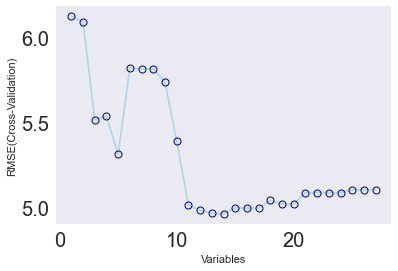

In [54]:
plt.plot(range(1, 28), rmse_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'DarkBlue', markerfacecolor = 'None')
plt.xlabel('Variables')
plt.ylabel('RMSE(Cross-Validation)')
plt.grid()
plt.show()

From the graph above we can see that the RMSE score is lowest when we use 14 features (RMSE score of 4.966082437270425).

## Linear regression model with the entire data frame
Now we will build our linear regression model for all countries in the tobacco data frame

### Changing categorical variables into dummy variables

In [55]:
tobacco_1=pd.get_dummies(tobacco['Protect from tobacco smoke'])
tobacco_2=pd.get_dummies(tobacco['Offer help to quit tobacco use'])
tobacco_3=pd.get_dummies(tobacco['Warn about the dangers of tobacco'])
tobacco_4=pd.get_dummies(tobacco['Enforce bans on tobacco advertising'])
tobacco_5=pd.get_dummies(tobacco['Raise taxes on tobacco'])
tobacco_6=pd.get_dummies(tobacco['Anti-tobacco mass media campaigns'])
tobacco_7=pd.get_dummies(tobacco['Monitor'])

tobacco_1.rename(columns={1:'Protect from tobacco smoke 1',2:'Protect from tobacco smoke 2',3:'Protect from tobacco smoke 3',4:'Protect from tobacco smoke 4',5:'Protect from tobacco smoke 5'}, inplace=True)
tobacco_2.rename(columns={2:'Offer help to quit tobacco use 2',3:'Offer help to quit tobacco use 3',4:'Offer help to quit tobacco use 4',5:'Offer help to quit tobacco use 5'}, inplace=True)
tobacco_3.rename(columns={2:'Warn about the dangers of tobacco 2',3:'Warn about the dangers of tobacco 3',4:'Warn about the dangers of tobacco 4',5:'Warn about the dangers of tobacco 5'}, inplace=True)
tobacco_4.rename(columns={2:'Enforce bans on tobacco advertising 2',4:'Enforce bans on tobacco advertising 4',5:'Enforce bans on tobacco advertising 5'}, inplace=True)
tobacco_5.rename(columns={2:'Raise taxes on tobacco 2',3:'Raise taxes on tobacco 3',4:'Raise taxes on tobacco 4',5:'Raise taxes on tobacco 5'}, inplace=True)
tobacco_6.rename(columns={1:'Anti-tobacco mass media campaigns 1',2:'Anti-tobacco mass media campaigns 2',3:'Anti-tobacco mass media campaigns 3',4:'Anti-tobacco mass media campaigns 4',5:'Anti-tobacco mass media campaigns 5'}, inplace=True)
tobacco_7.rename(columns={1:'Monitor 1',2:'Monitor 2',3:'Monitor 3',4:'Monitor 4'}, inplace=True)

tobacco_full=tobacco.join(tobacco_1)
tobacco_full=tobacco_full.join(tobacco_2)
tobacco_full=tobacco_full.join(tobacco_3)
tobacco_full=tobacco_full.join(tobacco_4)
tobacco_full=tobacco_full.join(tobacco_5)
tobacco_full=tobacco_full.join(tobacco_6)
tobacco_full=tobacco_full.join(tobacco_7)
tobacco_full.head()


,Country,Year,Estimate of current tobacco use prevalence (%) Both Sex,Estimate of current tobacco use prevalence (%) Male,Estimate of current tobacco use prevalence (%) Female,Estimate of current cigarette smoking prevalence (%) Both sexes,Estimate of current cigarette smoking prevalence (%) Male,Estimate of current cigarette smoking prevalence (%) Female,Affordability,Monitor,...,Raise taxes on tobacco 5,Anti-tobacco mass media campaigns 1,Anti-tobacco mass media campaigns 2,Anti-tobacco mass media campaigns 3,Anti-tobacco mass media campaigns 4,Anti-tobacco mass media campaigns 5,Monitor 1,Monitor 2,Monitor 3,Monitor 4
0,Albania,2018,29.2,50.5,7.9,24.2,43.3,5.0,4.17,2,...,0,0,1,0,0,0,0,1,0,0
1,Albania,2016,29.7,51.1,8.2,24.5,43.7,5.2,4.48,2,...,0,0,0,1,0,0,0,1,0,0
2,Albania,2014,30.1,51.7,8.5,24.8,44.3,5.4,4.14,2,...,0,0,1,0,0,0,0,1,0,0
3,Albania,2012,30.5,52.3,8.8,25.2,44.9,5.6,3.70,3,...,0,0,1,0,0,0,0,0,1,0
4,Albania,2010,31.1,53.2,9.1,25.8,45.7,5.8,3.52,3,...,0,0,0,0,0,1,0,0,1,0


### Splitting data into training and testing data

In [56]:
train, test = train_test_split(tobacco_full, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(544, 47)
(136, 47)


In [57]:
model = linear_model.LinearRegression()

X_train = train[['Affordability','Prevention measures taken (Sum)','Protect from tobacco smoke 1','Protect from tobacco smoke 2','Protect from tobacco smoke 3','Protect from tobacco smoke 4','Protect from tobacco smoke 5','Offer help to quit tobacco use 2','Offer help to quit tobacco use 3','Offer help to quit tobacco use 4','Offer help to quit tobacco use 5','Warn about the dangers of tobacco 2','Warn about the dangers of tobacco 3','Warn about the dangers of tobacco 4','Warn about the dangers of tobacco 5','Enforce bans on tobacco advertising 2','Enforce bans on tobacco advertising 4','Enforce bans on tobacco advertising 5','Raise taxes on tobacco 2','Raise taxes on tobacco 3','Raise taxes on tobacco 4','Raise taxes on tobacco 5','Anti-tobacco mass media campaigns 1','Anti-tobacco mass media campaigns 2','Anti-tobacco mass media campaigns 3','Anti-tobacco mass media campaigns 4','Anti-tobacco mass media campaigns 5','Monitor 1','Monitor 2','Monitor 3','Monitor 4']]
y_train = train[['Estimate of current tobacco use prevalence (%) Both Sex']]

X_test = test[['Affordability','Prevention measures taken (Sum)','Protect from tobacco smoke 1','Protect from tobacco smoke 2','Protect from tobacco smoke 3','Protect from tobacco smoke 4','Protect from tobacco smoke 5','Offer help to quit tobacco use 2','Offer help to quit tobacco use 3','Offer help to quit tobacco use 4','Offer help to quit tobacco use 5','Warn about the dangers of tobacco 2','Warn about the dangers of tobacco 3','Warn about the dangers of tobacco 4','Warn about the dangers of tobacco 5','Enforce bans on tobacco advertising 2','Enforce bans on tobacco advertising 4','Enforce bans on tobacco advertising 5','Raise taxes on tobacco 2','Raise taxes on tobacco 3','Raise taxes on tobacco 4','Raise taxes on tobacco 5','Anti-tobacco mass media campaigns 1','Anti-tobacco mass media campaigns 2','Anti-tobacco mass media campaigns 3','Anti-tobacco mass media campaigns 4','Anti-tobacco mass media campaigns 5','Monitor 1','Monitor 2','Monitor 3','Monitor 4']]
y_test = test[['Estimate of current tobacco use prevalence (%) Both Sex']]


model.fit(X_train, y_train)

LinearRegression()

In [58]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print("Scores on training set")
print("RMSE: ", round(np.sqrt(mean_squared_error(y_train, y_train_hat)),2))
print("R2: ", round(r2_score(y_train, y_train_hat),2))
print("MAE: ", round(mean_absolute_error(y_train, y_train_hat),2))
print("MAPE: ", round(mean_absolute_percentage_error(y_train, y_train_hat),2))
print()
print("Scores on testing set: ")
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, y_test_hat)),2))
print("R2: ", round(r2_score(y_test, y_test_hat),2))
print("MAE: ", round(mean_absolute_error(y_test, y_test_hat),2))
print("MAPE: ", round(mean_absolute_percentage_error(y_test, y_test_hat),2))

Scores on training set
RMSE:  8.44
R2:  0.32
MAE:  6.4
MAPE:  38.18

Scores on testing set: 
RMSE:  9.22
R2:  0.21
MAE:  6.88
MAPE:  35.45


We can see obvious overfitting of the model as its performance is much better on the training set than the testing set. The data for all countries also does not perform as well as the linear regression model on the European data which had a Mean Absolute Percentage Error (MAPE_ of 14.59% compared to 35.45% for this model. 
Also, the r2 score for all countries is lower than that for European countries, 0.21 compared to 0.3. This is because the model performs better when focused on a specific, similar group of countries compared to all countries.

In [59]:
estimator = linear_model.LinearRegression()
rmse_scores = []
for i in range(1,30):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)
    y_test_pred = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "featuers: ", rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 featuers:  10.210014599578836
RMSE score on test set using 2 featuers:  10.203224743022917
RMSE score on test set using 3 featuers:  9.874726075963778
RMSE score on test set using 4 featuers:  9.672789102235914
RMSE score on test set using 5 featuers:  9.774371260126085
RMSE score on test set using 6 featuers:  9.752857197905884
RMSE score on test set using 7 featuers:  9.737560368367177
RMSE score on test set using 8 featuers:  9.351444258189863
RMSE score on test set using 9 featuers:  9.374684654473015
RMSE score on test set using 10 featuers:  9.369302112878577
RMSE score on test set using 11 featuers:  9.338479517092443
RMSE score on test set using 12 featuers:  9.21182551626358
RMSE score on test set using 13 featuers:  9.246236433170756
RMSE score on test set using 14 featuers:  9.209021301093433
RMSE score on test set using 15 featuers:  9.181848728014376
RMSE score on test set using 16 featuers:  9.155988836617158
RMSE score on test set using 17 

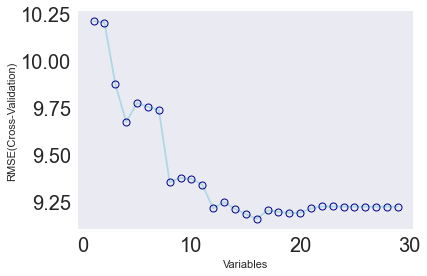

In [60]:
plt.plot(range(1, 30), rmse_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'DarkBlue', markerfacecolor = 'None')
plt.xlabel('Variables')
plt.ylabel('RMSE(Cross-Validation)')
plt.grid()
plt.show()

From the graph above we can see that the RMSE is the lowest when the model uses 16 features (RMSE score of 9.155988836617158).

## Conclusion for Linear Regression Model
The performance of the linear regression model was quite poor in that the Root Mean Squared Error was quite high. The model performed better when restricted to predicting tobacco usage rates for a specific continents rather than for all countries. This was expected after our initial data exploration, since certain countries' tobacco usage rates were not accurately explained by their levels of prevention measures since they were constantly changing them, and other cultural factors were not taken into account. 

# Logistic Regression Model

We will now use logistic regression models to see which of the MPOWER policies, which include:
1. Raise taxes on tobacco
2. Protect from tobacco smoke
3. Warn about dangers of tobacco
4. Offer help to quit tobacco use
5. Anti-tobacco mass media campaigns
6. Enforce bans on tobacco advertising
7. Monitor

Have the greatest correlation with the tobacco usage rate for both sexes.

## 1. Raise taxes on tobacco

In [73]:
Y=tobacco_full['Raise taxes on tobacco']
X=tobacco_full[['Estimate of current tobacco use prevalence (%) Both Sex']]

In [74]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=142)
print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of testing data:", X_test.shape, y_test.shape)

Shape of training data: (544, 1) (544,)
Shape of testing data: (136, 1) (136,)


In [75]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred=lr.predict(X_test)
print("Accuracy score for Raise Taxes on tobacco: %.4f\n" % accuracy_score(y_test,y_pred))

Accuracy score for Raise Taxes on tobacco: 0.4412



## 2.Protect from tobacco smoke

In [77]:
Y=tobacco_full['Protect from tobacco smoke']
X=tobacco_full[['Estimate of current tobacco use prevalence (%) Both Sex']]

In [78]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=142)
print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of testing data:", X_test.shape, y_test.shape)

Shape of training data: (544, 1) (544,)
Shape of testing data: (136, 1) (136,)


In [79]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [80]:
y_pred=lr.predict(X_test)
print("Accuracy Score for Protect from tobacco smoke: %.4f\n" % accuracy_score(y_test,y_pred))

Accuracy Score for Protect from tobacco smoke: 0.4706



## 3.Warn about the dangers of tobacco

In [81]:
Y=tobacco_full['Warn about the dangers of tobacco']
X=tobacco_full[['Estimate of current tobacco use prevalence (%) Both Sex']]

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=142)
print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of testing data:", X_test.shape, y_test.shape)

Shape of training data: (544, 1) (544,)
Shape of testing data: (136, 1) (136,)


In [83]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [84]:
y_pred=lr.predict(X_test)
print("Accuracy score for Warn about the dangers of tobacco: %.4f\n" % accuracy_score(y_test,y_pred))

Accuracy score for Warn about the dangers of tobacco: 0.3456



## 4.Offer help to quit tobacco use

In [85]:
Y=tobacco_full['Offer help to quit tobacco use']
X=tobacco_full[['Estimate of current tobacco use prevalence (%) Both Sex']]

In [86]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=142)
print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of testing data:", X_test.shape, y_test.shape)

Shape of training data: (544, 1) (544,)
Shape of testing data: (136, 1) (136,)


In [87]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_pred=lr.predict(X_test)
print("Accuracy score for Offer help to quit tobacco use: %.4f\n" % accuracy_score(y_test,y_pred))

Accuracy score for Offer help to quit tobacco use: 0.5368



## 5.Anti-tobacco mass media campaigns

In [89]:
Y=tobacco_full['Anti-tobacco mass media campaigns']
X=tobacco_full[['Estimate of current tobacco use prevalence (%) Both Sex']]

In [90]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=142)
print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of testing data:", X_test.shape, y_test.shape)

Shape of training data: (544, 1) (544,)
Shape of testing data: (136, 1) (136,)


In [91]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [92]:
y_pred=lr.predict(X_test)
print("Accuracy score for Anti-tobacco mass media campaigns: %.4f" % accuracy_score(y_test,y_pred))

Accuracy score for Anti-tobacco mass media campaigns: 0.4926


## 6.Enforce bans on tobacco advertising

In [93]:
Y=tobacco['Enforce bans on tobacco advertising']
X=tobacco_full[['Estimate of current tobacco use prevalence (%) Both Sex']]

In [94]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=142)
print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of testing data:", X_test.shape, y_test.shape)

Shape of training data: (544, 1) (544,)
Shape of testing data: (136, 1) (136,)


In [95]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [96]:
y_pred=lr.predict(X_test)
print("Accuracy score for Enforce bans on tobacco: %.4f\n" % accuracy_score(y_test,y_pred))

Accuracy score for Enforce bans on tobacco: 0.5809



## 7.'Monitor' logistic regression

In [97]:
Y=tobacco_full['Monitor']
X=tobacco_full[['Estimate of current tobacco use prevalence (%) Both Sex']]

In [98]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=142)
print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of testing data:", X_test.shape, y_test.shape)

Shape of training data: (544, 1) (544,)
Shape of testing data: (136, 1) (136,)


In [99]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [100]:
y_pred=lr.predict(X_test)
print("Accuracy score for Monitor: %.4f\n" % accuracy_score(y_test,y_pred))

Accuracy score for Monitor: 0.5294



## Accuracy scores highest to lowest for each MPOWER Policy
* Enforce bans on tobacco advertising' accuracy score:  0.5809
* Offer help to quit tobacco use' accuracy score : 0.5368
* Monitor accuracy score: 0.5294
* Anti-tobacco mass media campaigns accuracy score :  0.4926
* Protect from tobacco smoke accuracy score : 0.4706
* Raise taxes on tobacco accuracy score :  0.4412
* Warn about the dangers of tobacco accuracy score : 0.3456

So we can see that 'Enforce bans on tobacco advertising' is the policy that has the greatest influence on the fluctuations in the 'Estimate of current tobacco use prevalence (%) Both Sex'.

# Building and Comparing models that predict the strength of Enforce bans on tobacco policies implemented by a country based on its tobacco usage rates

## 1.GaussianNB

In [101]:
X=tobacco[['Estimate of current tobacco use prevalence (%) Both Sex']].values
y=tobacco['Enforce bans on tobacco advertising'].values

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=142)

In [103]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [104]:
y_pred_clf=clf.predict(X_test)

In [105]:
print("Gaussian Naive Bayes' accuracy_score: %.4f" % accuracy_score(y_test,y_pred_clf))

Gaussian Naive Bayes' accuracy_score: 0.5809


## 2.Multinomial Naive bayes

In [106]:
clf2 = MultinomialNB()
clf2.fit(X_train,y_train)

MultinomialNB()

In [107]:
y_pred_clf2=clf2.predict(X_test)

In [108]:
print("Multinomial Naive Bayes' accuracy_score: %.4f" % accuracy_score(y_test,y_pred_clf2))

Multinomial Naive Bayes' accuracy_score: 0.5956


## 3.KNeighborsClassifier

In [109]:
#Seting up empty arrays for training and testing accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors which is going to be incremented 1 until 9
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train, y_train)
    #Calculating accuracy score for each training set tested
    train_accuracy[i] = knn.score(X_train, y_train)
    #Calculating accuracy score for each testing score tested
    test_accuracy[i] = knn.score(X_test, y_test) 

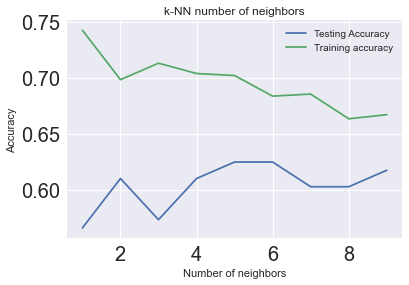

In [110]:
plt.title('k-NN number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe that the highest testing accuracy is k = 6.

**Using K = 6 to build K-nearest neighbour classifier**

In [111]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train,y_train)
y_pred_neigh=neigh.predict(X_test)

In [112]:
print("KNeighborsClassifier's accuracy_score: %.4f" % accuracy_score(y_test,y_pred_neigh))

KNeighborsClassifier's accuracy_score: 0.6250


## Comparing the Accuracy Scores for all our models

1.KNeighborsClassifier's accuracy score: 0.6250

2.Gaussian Naive Bayes' accuracy score: 0.5809

3.Logistic Regression's accuracy score: 0.5809

4.Multinomial Naive Bayes' accuracy score: 0.5956

Based on this, KNN classifier when K = 6 is the most accurate model for predicting the strength of the 'Enforce Bans on tobacco advertising' policy implemented by each country, with an accuracy of 62.5%.

# Conclusion

Our initial aim for the project was to be able to predict the tobacco usage rates for each country based on the strength of their respective MPOWER policies and their overall prevention measures taken, which summed the values of all MPOWER columns. However, upon our initial data exploration we discovered that there was not just major differences in the variation of prevention levels taken between each country but also cultural factors not included in the data. This led to some continents displaying unusual relationships such as greater levels of tobacco use in response to greater taxes on cigarettes.

As a result when it came to building our linear regression model to predict the tobacco usage rates for each country, the performance was quite poor as only 21% of the variation in tobacco usage rates could be explained by the variation in the features used for the model. We subsequently found that our linear regression model had greater accuracy in predicting tobacco usage rates for individual continents, as the countries within this data frame will be similar culturally, but it will also not include the countries that have high levels of variation in their prevention measures from other continents. This was evident with the regression model for Europe performing much better than that for all countries.

Our project then expanded to finding which policy had the greatest correlation with the tobacco usage rates of a country. We built linear regression models to evaluate the accuracy of each MPOWER feature and concluded that 'Enforce bans on tobacco advertising' had the greatest correlation with the tobacco usage rates. We explored this further by subsequently building a Gaussian, Multinomial Naive Bayes Classifier models as well as a K-Nearest Neighbor Model to determine which had the highest accuracy in predicting the strength of a country's 'Enforce Bans on tobacco policy' based on its tobacco usage rate. We concluded that it was the KNN model when K = 6 with an accuracy of 62.5%.